In [ ]:
!pip install --upgrade --force-reinstall numpy==1.23.5 scikit-learn==1.3.0 xgboost==1.7.6

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached scikit_learn-1.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached scikit_learn-1.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
Using cached xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl (200.3 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18

In [ ]:
!pip install catboost scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("crop_yield.csv")

In [ ]:
df.describe()

Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009  
std    9.494600e+07  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000  
50%    1.234957e+06  2.421900e+03      1.030000  
75%    1.000385e+07  2.004170e+04      2.388889  
max    4.835407e+09  1.575051e+07  21105.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include=["int64","float64"])

Crop_Year        Area    Production  Annual_Rainfall    Fertilizer  \
count   19689.00    19689.00      19689.00         19689.00      19689.00   
mean     2009.13   179926.57   16435941.27          1437.76   24103312.45   
std         6.50   732828.68  263056839.81           816.91   94946004.48   
min      1997.00        0.50          0.00           301.30         54.17   
25%      2004.00     1390.00       1393.00           940.70     188014.62   
50%      2010.00     9317.00      13804.00          1247.60    1234957.44   
75%      2015.00    75112.00     122718.00          1643.70   10003847.20   
max      2020.00 50808100.00 6326000000.00          6552.70 4835406877.00   

        Pesticide    Yield  
count    19689.00 19689.00  
mean     48848.35    79.95  
std     213287.35   878.31  
min          0.09     0.00  
25%        356.70     0.60  
50%       2421.90     1.03  
75%      20041.70     2.39  
max   15750511.00 21105.00

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.head()

Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0       1997 73814.00       56708          2051.40  7024878.38   22882.34   
1       1997  6637.00        4685          2051.40   631643.29    2057.47   
2       1997   796.00          22          2051.40    75755.32     246.76   
3       1997 19656.00   126905000          2051.40  1870661.52    6093.36   
4       1997  1739.00         794          2051.40   165500.63     539.09   

    Yield  
0    0.80  
1    0.71  
2    0.24  
3 5238.05  
4    0.42

In [ ]:
df['Season'] = df['Season'].str.strip()
df['Crop'] = df['Crop'].str.strip()
df['State'] = df['State'].str.strip()

In [ ]:
df.rename(columns={'Fertilizer': 'Fertilizer_Total', 'Pesticide': 'Pesticide_Total'}, inplace=True)
df['Fertilizer'] = df['Fertilizer_Total'] / df['Area']
df['Pesticide'] = df['Pesticide_Total'] / df['Area']

In [ ]:
crop_counts = df['Crop'].value_counts()
print(crop_counts)

Crop
Rice                     1185
Maize                     964
Moong(Green Gram)         733
Urad                      728
Groundnut                 718
Sesamum                   678
Potato                    617
Sugarcane                 593
Wheat                     538
Bajra                     523
Rapeseed &Mustard         522
Jowar                     507
Arhar/Tur                 498
Ragi                      488
Gram                      477
Small millets             474
Cotton(lint)              464
Onion                     437
Sunflower                 429
Dry chillies              396
Other Kharif pulses       381
Horse-gram                370
Peas & beans (Pulses)     362
Tobacco                   356
Other  Rabi pulses        347
Soyabean                  341
Turmeric                  327
Ginger                    318
Masoor                    317
Linseed                   301
Castor seed               296
Barley                    292
Sweet potato              259
Garli

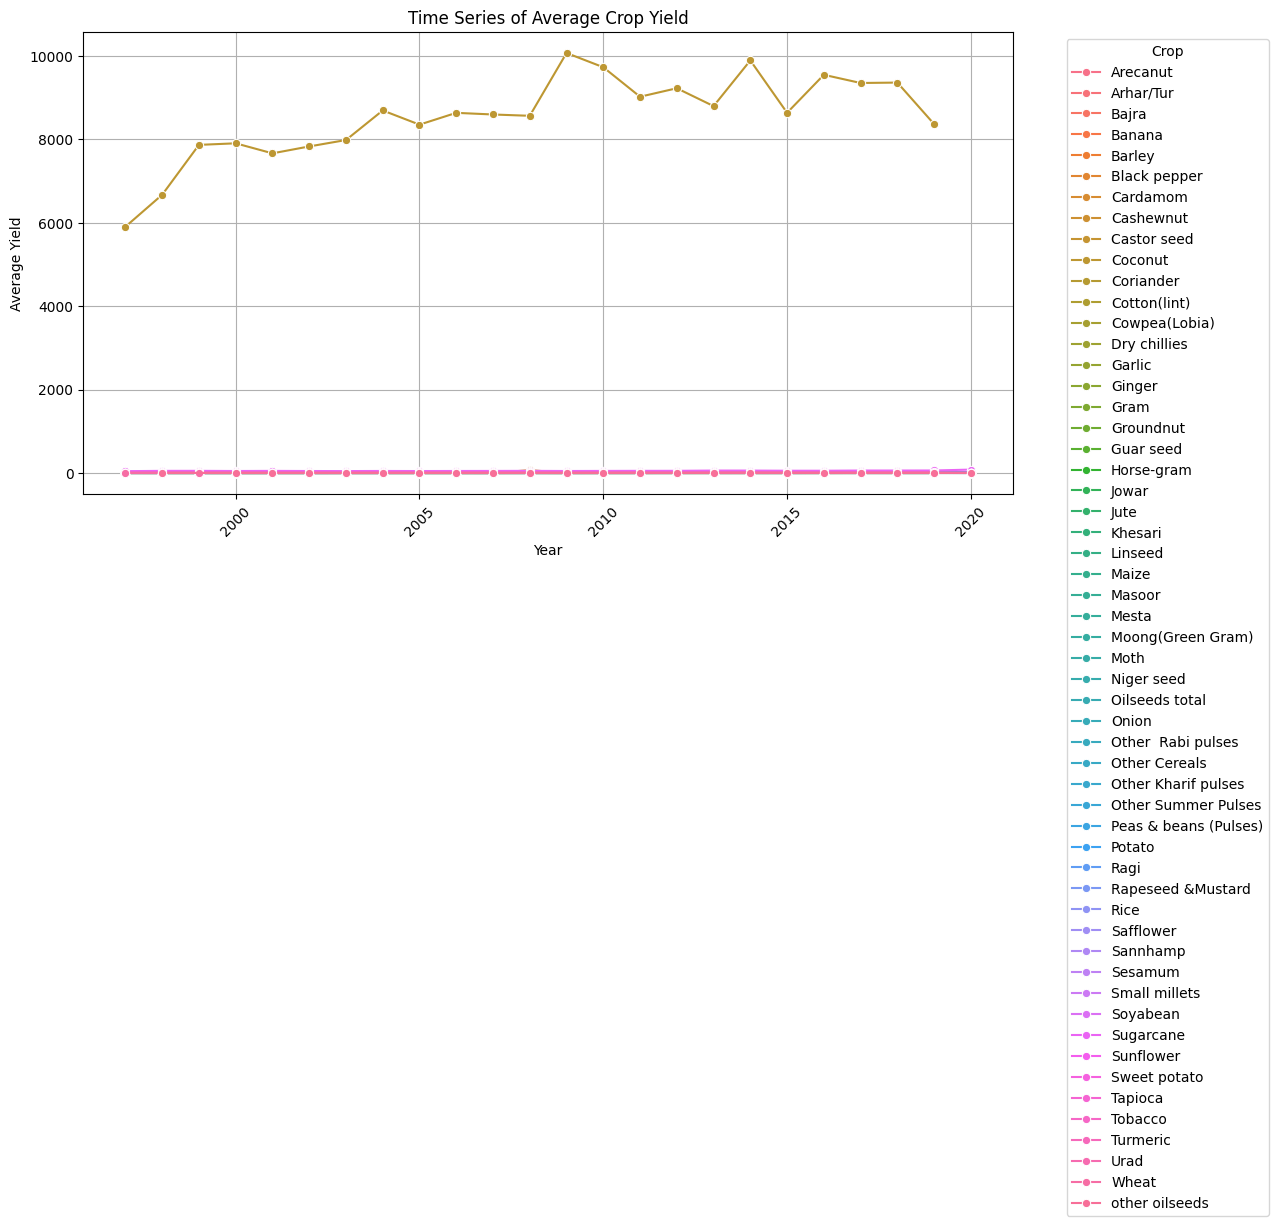

In [ ]:
avg_yield = df.groupby(["Crop", "Crop_Year"])['Yield'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_yield, x="Crop_Year", y="Yield", hue="Crop", marker="o")

# Formatting
plt.xlabel("Year")
plt.ylabel("Average Yield")
plt.title("Time Series of Average Crop Yield")
plt.legend(title="Crop", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()

In [ ]:
# Filter out 'Coconut'
filtered_df = df[df['Crop'] != 'Coconut']

# Group by 'Crop' and 'Crop_Year', then calculate the mean 'Yield'
avg_yield = filtered_df.groupby(["Crop", "Crop_Year"])['Yield'].mean().reset_index()

# Create an interactive line plot
fig = px.line(avg_yield, x="Crop_Year", y="Yield", color="Crop",
              title="Time Series of Average Crop Yield",
              labels={"Crop_Year": "Year", "Yield": "Average Yield"},
              hover_data=["Crop", "Yield"])

# Set fixed axis ranges to prevent zooming
fig.update_layout(
    xaxis=dict(range=[avg_yield['Crop_Year'].min(), avg_yield['Crop_Year'].max()]),
    yaxis=dict(range=[avg_yield['Yield'].min(), avg_yield['Yield'].max()]),
    legend_title="Crop",
    legend=dict(
        itemclick='toggleothers',  # Make other crops invisible when clicking one
    )
)

# Show the plot
fig.show()

In [ ]:
# Get counts of each Crop-State-Season group
group_counts = df.groupby(['Crop', 'State', 'Season']).size()

# Identify small groups (fewer than 3 rows)
small_groups = group_counts[group_counts < 3].index

print(small_groups)
# Remove small groups from the dataset
df = df[~df.set_index(['Crop', 'State', 'Season']).index.isin(small_groups)]

MultiIndex([(     'Arhar/Tur', 'Jammu and Kashmir',       'Rabi'),
            (     'Arhar/Tur',         'Jharkhand',     'Winter'),
            (     'Arhar/Tur',    'Madhya Pradesh', 'Whole Year'),
            (     'Arhar/Tur',            'Odisha',     'Autumn'),
            (     'Arhar/Tur',            'Odisha',     'Summer'),
            (     'Arhar/Tur',            'Odisha',     'Winter'),
            (     'Arhar/Tur',        'Tamil Nadu',       'Rabi'),
            (     'Arhar/Tur',       'West Bengal', 'Whole Year'),
            (         'Bajra',    'Madhya Pradesh', 'Whole Year'),
            (        'Banana',           'Haryana', 'Whole Year'),
            ...
            ('other oilseeds',           'Gujarat', 'Whole Year'),
            ('other oilseeds',           'Haryana',     'Kharif'),
            ('other oilseeds', 'Jammu and Kashmir', 'Whole Year'),
            ('other oilseeds',            'Kerala', 'Whole Year'),
            ('other oilseeds',       'Maharash

In [ ]:
def replace_outliers_with_mean_state_season(df, column_name):
    grouped = df.groupby(['Crop', 'State', 'Season'])

    for (crop, state, season), state_season_data in grouped:
        if len(state_season_data) < 3:  # Skip small groups
            continue

        Q1 = state_season_data[column_name].quantile(0.25)
        Q3 = state_season_data[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Compute mean without outliers
        valid_values = state_season_data[(state_season_data[column_name] >= lower_bound) &
                                         (state_season_data[column_name] <= upper_bound)][column_name]

        if valid_values.empty:
            continue  # Skip if no valid values remain

        state_season_mean = valid_values.mean()  # Use mean of only non-outlier values

        # Replace outliers
        mask = (df['Crop'] == crop) & (df['State'] == state) & (df['Season'] == season) & (
            (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
        )
        df.loc[mask, column_name] = state_season_mean
        print(f"Replaced outliers in {column_name} for {crop}, {state}, {season} with mean: {state_season_mean}")

    return df

# Apply to numerical columns
numerical_columns = ['Yield', 'Fertilizer', 'Pesticide', 'Annual_Rainfall']
for col in numerical_columns:
    df = replace_outliers_with_mean_state_season(df, col)


Streaming output truncated to the last 5000 lines.
Replaced outliers in Yield for Linseed, Maharashtra, Rabi with mean: 0.2878160311818182
Replaced outliers in Yield for Linseed, Meghalaya, Rabi with mean: 0.5223529411764707
Replaced outliers in Yield for Linseed, Nagaland, Rabi with mean: 0.765340909
Replaced outliers in Yield for Linseed, Odisha, Rabi with mean: 0.39540291485714285
Replaced outliers in Yield for Linseed, Punjab, Rabi with mean: 1.0
Replaced outliers in Yield for Linseed, Telangana, Rabi with mean: 0.44
Replaced outliers in Yield for Linseed, Uttar Pradesh, Rabi with mean: 0.438273827
Replaced outliers in Yield for Linseed, Uttarakhand, Rabi with mean: 0.3498333334
Replaced outliers in Yield for Linseed, West Bengal, Rabi with mean: 0.32582036542857146
Replaced outliers in Yield for Maize, Andhra Pradesh, Kharif with mean: 3.3106057132608693
Replaced outliers in Yield for Maize, Andhra Pradesh, Rabi with mean: 6.085303930909092
Replaced outliers in Yield for Maize, Ar

In [ ]:
import pandas as pd

# Assuming df contains the dataset with columns 'Crop', 'Season', and 'State'

# Create a pivot table for Season
crop_season_df = df.pivot_table(index="Crop", columns="Season", aggfunc="size", fill_value=0)

# Create a pivot table for State
crop_state_df = df.pivot_table(index="Crop", columns="State", aggfunc="size", fill_value=0)

print("\nCrop vs State Count:")
crop_state_df



Crop vs State Count:


State                  Andhra Pradesh  Arunachal Pradesh  Assam  Bihar  \
Crop                                                                     
Arecanut                           18                  0     22      0   
Arhar/Tur                          41                  4     23     23   
Bajra                              45                  0      0     23   
Banana                             18                  0     21     10   
Barley                              0                  0      0     22   
Black pepper                        0                  0     13      0   
Cardamom                            0                  0      0      0   
Cashewnut                          19                  0      0      0   
Castor seed                        30                  0     23     18   
Coconut                            19                  0     22      0   
Coriander                          24                  0      0     14   
Cotton(lint)                       30                  0     23      0   
Cowpea(Lobia)                      18                  0      0      0   
Dry chillies                       44                 22     23     11   
Garlic                              5                  0      0     15   
Ginger                             23                 22     13     16   
Gram                               33                  0     23     23   
Groundnut                          46                  4      0     21   
Guar seed                           0                  0      0      0   
Horse-gram                         46                  0      0     18   
Jowar                              46                  0      0     23   
Jute                                0                  0     23     23   
Khesari                             0                  0      0     21   
Linseed                            20                  0     23     23   
Maize                              46                 23     22     69   
Masoor                              0                  4     19     21   
Mesta                              25                  0     23     23   
Moong(Green Gram)                  46                  4     19     42   
Moth                                0                  0      0      0   
Niger seed                         22                  0     22      0   
Oilseeds total                      9                 19      0      0   
Onion                              40                  0     23     15   
Other  Rabi pulses                 20                  4     14     22   
Other Cereals                       0                  0      0      0   
Other Kharif pulses                21                  4      0     21   
Other Summer Pulses                 0                  0      0      0   
Peas & beans (Pulses)               0                  8     19     21   
Potato                             27                 22     23     19   
Ragi                               46                  0      0     22   
Rapeseed &Mustard                  20                  6     23     23   
Rice                               46                 23     69     68   
Safflower                          23                  0      0     19   
Sannhamp                            0                  0      0     18   
Sesamum                            46                  6     22     22   
Small millets                      42                 23     23     21   
Soyabean                           25                  6      0      0   
Sugarcane                          23                 22     22     21   
Sunflower                          35                  6      0     23   
Sweet potato                       27                  0     23     10   
Tapioca                            26                  0     22      0   
Tobacco                            32                  0     23     20   
Turmeric                            0                 22     23     15   
Urad

In [ ]:
# Display the DataFrames
print("Crop vs Season Count:")
crop_season_df

Crop vs Season Count:


Season                 Autumn  Kharif  Rabi  Summer  Whole Year  Winter
Crop                                                                   
Arecanut                    0      20    16       0         126       0
Arhar/Tur                   0     418    66       0          14       0
Bajra                       0     389    58      52          24       0
Banana                      0      32     0      11         193       0
Barley                      0      46   246       0           0       0
Black pepper                0      11     6       0         106       0
Cardamom                    0       3     0       0          71       0
Cashewnut                   0      27     5       0         101       0
Castor seed                 0     255    35       0           6       0
Coconut                     0       0     0       0         168       0
Coriander                   0      10    46       0         132       0
Cotton(lint)                0     404    25      14          21       0
Cowpea(Lobia)               0      67    50       8           3       0
Dry chillies                0      95    55      24         222       0
Garlic                      0       6    45       0         189       0
Ginger                      0     165    12       0         141       0
Gram                        0      10   461       0           6       0
Groundnut                  29     423   129     102          17      18
Guar seed                   0      29     0       0          27       0
Horse-gram                  0     215   111      18           8      18
Jowar                       8     326   124      30          19       0
Jute                       18     156     0       0           0       0
Khesari                     0       0    71       0           0       0
Linseed                     0       8   293       0           0       0
Maize                      59     514   215     140          18      18
Masoor                      0      13   304       0           0       0
Mesta                       0     184     3       0          15       0
Moong(Green Gram)          17     380   185     121          13      17
Moth                        0     103     3       0           0       0
Niger seed                  0     160    19       0           0       5
Oilseeds total              0       5     4       0          19       0
Onion                       0      67   137      47         186       0
Other  Rabi pulses          0       0   341       6           0       0
Other Cereals               0      73    62       4           0       0
Other Kharif pulses         0     377     4       0           0       0
Other Summer Pulses         0       0     0       8           0       0
Peas & beans (Pulses)       0      77   281       4           0       0
Potato                      0     112   161      34         269      41
Ragi                       44     288    73      53          12      18
Rapeseed &Mustard           0      21   479       0           5      17
Rice                      155     505   139     242           0     144
Safflower                   0       7   156       0           0       0
Sannhamp                    0      73     0       0          76       0
Sesamum                    33     437    79      60          36      33
Small millets               8     353    98       8           7       0
Soyabean                    0     321    16       0           4       0
Sugarcane                   0      64     3       0         507      19
Sunflower                   0     218   135      60          16       0
Sweet potato                0      56    22       0         181       0
Tapioca                     0      63    20       0         117       0
Tobacco                     0      40    53      13         250       0
Turmeric                    0      42    27       0         258       0
Urad                       18     403   199      82           8      18
Wheat                       0       0   

In [ ]:
df.describe()

Crop_Year          Area    Production  Annual_Rainfall  \
count  19279.000000  1.927900e+04  1.927900e+04     19279.000000   
mean    2009.191971  1.791836e+05  1.677630e+07      1430.695448   
std        6.453672  6.414161e+05  2.658286e+08       802.167350   
min     1997.000000  1.000000e+00  0.000000e+00       301.300000   
25%     2004.000000  1.469500e+03  1.456000e+03       940.700000   
50%     2010.000000  9.603000e+03  1.406200e+04      1238.500000   
75%     2015.000000  7.692150e+04  1.250205e+05      1632.400000   
max     2020.000000  1.021652e+07  6.326000e+09      6552.700000   

       Fertilizer_Total  Pesticide_Total         Yield    Fertilizer  \
count      1.927900e+04     1.927900e+04  19279.000000  19279.000000   
mean       2.410999e+07     4.863099e+04     79.223541    137.581354   
std        8.898162e+07     1.830263e+05    863.945847     25.966082   
min        9.467000e+01     9.000000e-02      0.000000     94.670000   
25%        1.970916e+05     3.778600e+02      0.600000    108.340000   
50%        1.268337e+06     2.487600e+03      1.025275    150.800000   
75%        1.022561e+07     2.039177e+04      2.371229    157.910000   
max        1.754789e+09     3.780111e+06  16935.058460    193.610000   

          Pesticide  
count  19279.000000  
mean       0.276633  
std        0.071285  
min        0.090000  
25%        0.240000  
50%        0.270000  
75%        0.330000  
max        0.380000

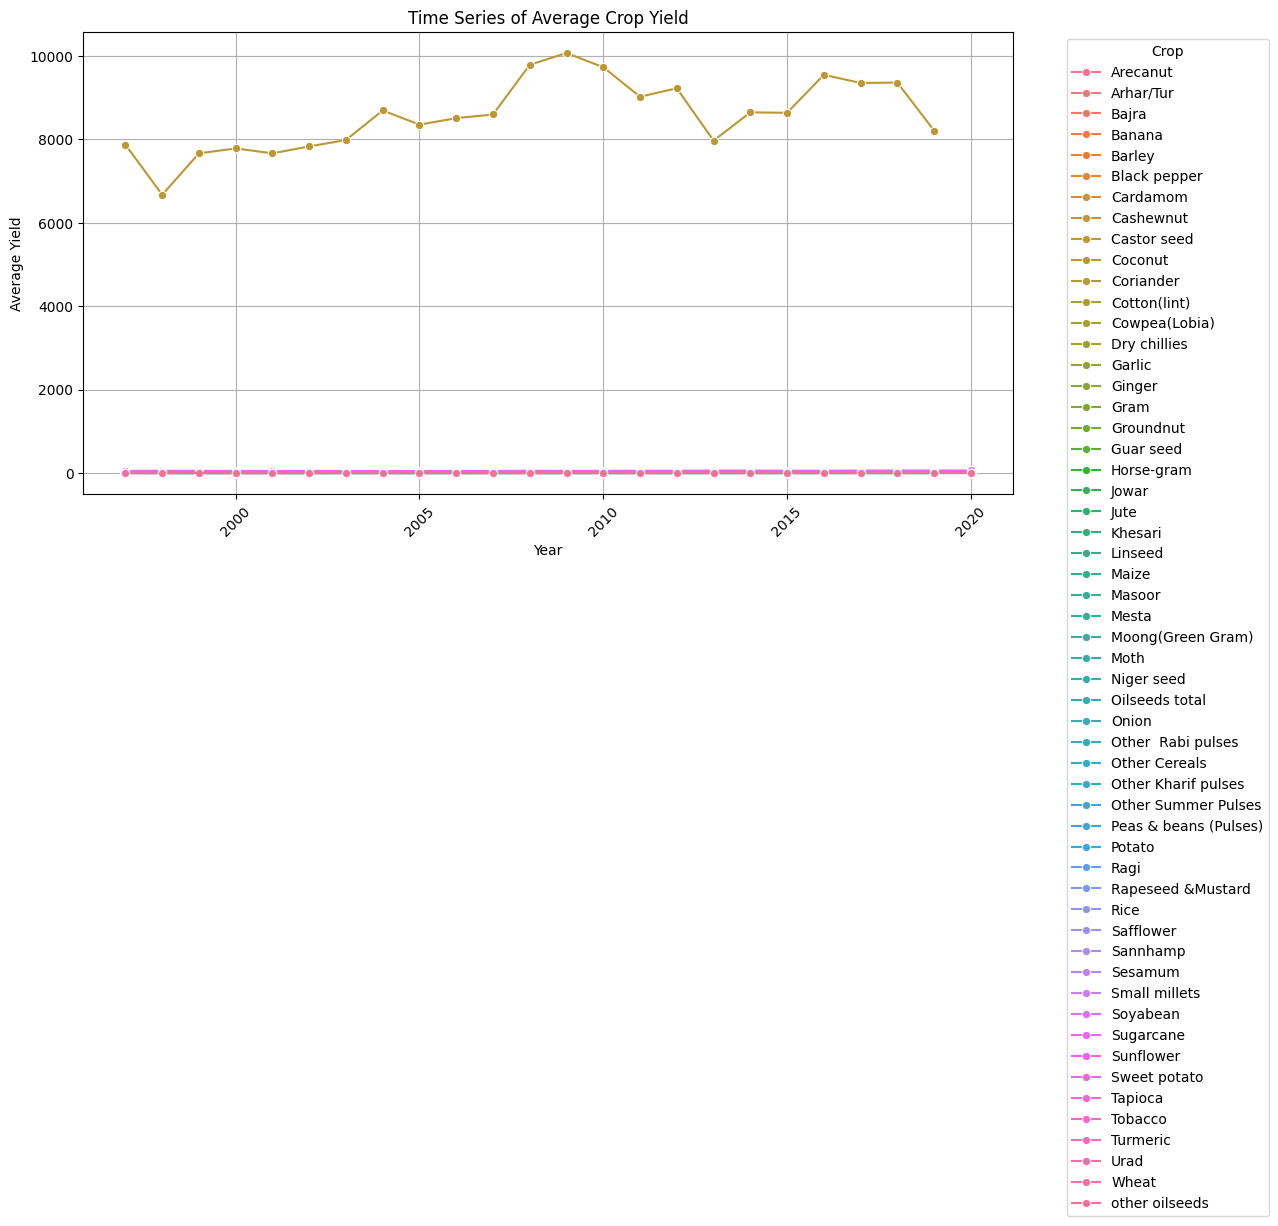

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
avg_yield = df.groupby(["Crop", "Crop_Year"])['Yield'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_yield, x="Crop_Year", y="Yield", hue="Crop", marker="o")

# Formatting
plt.xlabel("Year")
plt.ylabel("Average Yield")
plt.title("Time Series of Average Crop Yield")
plt.legend(title="Crop", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()

In [ ]:
df_coconut = df[df['Crop'] == 'Coconut']
df_coconut

Crop  Crop_Year      Season        State      Area  Production  \
3      Coconut       1997  Whole Year        Assam   19656.0   126905000   
60     Coconut       1997  Whole Year       Kerala  884344.0  5210000000   
94     Coconut       1997  Whole Year  West Bengal   24273.0   306202300   
150    Coconut       1998  Whole Year        Assam   20166.0   149866000   
178    Coconut       1998  Whole Year          Goa   24858.0   121000000   
...        ...        ...         ...          ...       ...         ...   
18561  Coconut       2005  Whole Year   Puducherry    2194.0    29414000   
18855  Coconut       2004  Whole Year          Goa   25160.0   123520000   
18862  Coconut       2005  Whole Year          Goa   25312.0   125340000   
18869  Coconut       2006  Whole Year          Goa   25468.0   126680000   
18876  Coconut       2007  Whole Year          Goa   25545.0   127570000   

       Annual_Rainfall  Fertilizer_Total  Pesticide_Total         Yield  \
3            2051.4000        1870661.52          6093.36   5238.051739   
60           3252.4000       84163018.48        274146.64   5376.054286   
94           1852.9000        2310061.41          7524.63  13003.787780   
150          2354.4000        1992400.80          5848.14   6045.886957   
178          2964.9000        2455970.40          7208.82   4867.650000   
...                ...               ...              ...           ...   
18561        1434.5875         263104.48           460.74  11250.412500   
18855        2518.0000        2725834.40          5283.60   4909.375000   
18862        3392.8000        3035415.04          5315.52   4951.730000   
18869        2928.8000        3252518.28          5602.96   4974.045000   
18876        3674.7000        3407703.00          4087.20   4993.770000   

       Fertilizer  Pesticide  
3           95.17       0.31  
60          95.17       0.31  
94          95.17       0.31  
150         98.80       0.29  
178         98.80       0.29  
...           ...        ...  
18561      119.92       0.21  
18855      108.34       0.21  
18862      119.92       0.21  
18869      127.71       0.22  
18876      133.40       0.16  

[168 rows x 12 columns]

Coconut truly has a much higher yield per hectare than other crops. This suggests:

Coconut trees are extremely productive

Unlike seasonal crops, coconut trees produce fruit throughout the year, leading to a high total production per hectare.
Tree-based crops vs. field crops

Coconut trees yield fruit multiple times a year, unlike crops like wheat or rice, which are harvested only once or twice.
Tree crops (like coconut, bananas, and oil palms) often have higher yield metrics than field crops.
High-Density Planting

In some states (e.g., Kerala, Tamil Nadu), high-density coconut farming is practiced, increasing per-hectare output.

In [ ]:
import pandas as pd
import plotly.express as px

# Filter out 'Coconut'
filtered_df = df[df['Crop'] != 'Coconut']

# Group by 'Crop' and 'Crop_Year', then calculate the mean 'Yield'
avg_yield = filtered_df.groupby(["Crop", "Crop_Year"])['Yield'].mean().reset_index()

# Create an interactive line plot
fig = px.line(avg_yield, x="Crop_Year", y="Yield", color="Crop",
              title="Time Series of Average Crop Yield",
              labels={"Crop_Year": "Year", "Yield": "Average Yield"},
              hover_data=["Crop", "Yield"])

# Set fixed axis ranges to prevent zooming
fig.update_layout(
    xaxis=dict(range=[avg_yield['Crop_Year'].min(), avg_yield['Crop_Year'].max()]),
    yaxis=dict(range=[avg_yield['Yield'].min(), avg_yield['Yield'].max()]),
    legend_title="Crop",
    legend=dict(
        itemclick='toggleothers',  # Make other crops invisible when clicking one
    )
)

# Show the plot
fig.show()

In [ ]:
df['Crop_Year'].value_counts(ascending=False)

Crop_Year
2017    1058
2018    1055
2019    1037
2016    1027
2015     988
2013     955
2014     954
2011     898
2012     889
2010     850
2009     840
2008     836
2007     819
2006     804
2005     799
2002     798
2003     789
2004     777
2000     764
2001     741
1999     620
1998     587
1997     358
2020      36
Name: count, dtype: int64

In [ ]:
df['Season'].value_counts(ascending=False)

Season
Kharif        8127
Rabi          5633
Whole Year    3601
Summer        1163
Autumn         389
Winter         366
Name: count, dtype: int64

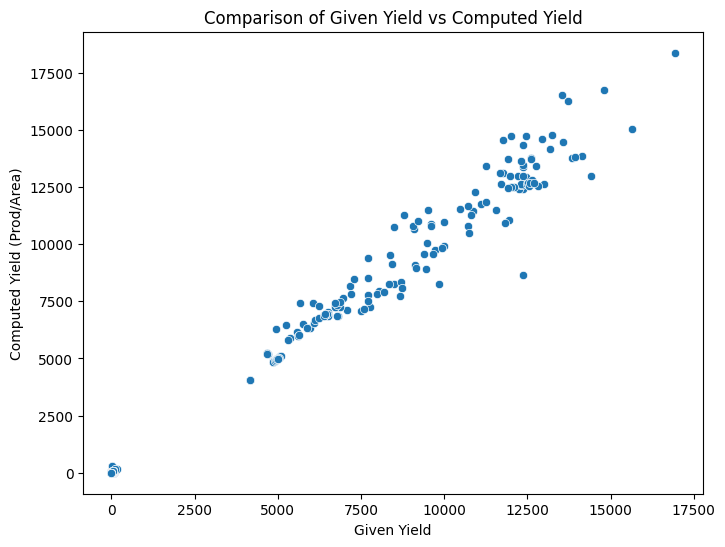

In [ ]:
df['Expected_Yield'] = df['Production'] / df['Area']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Yield'], y=df['Expected_Yield'])
plt.xlabel("Given Yield")
plt.ylabel("Computed Yield (Prod/Area)")
plt.title("Comparison of Given Yield vs Computed Yield")
plt.show()

In [ ]:
correlation = df[['Yield', 'Expected_Yield']].corr()
print(correlation)

                   Yield  Expected_Yield
Yield           1.000000        0.996361
Expected_Yield  0.996361        1.000000


In [ ]:
df

Crop  Crop_Year      Season              State      Area  \
0           Arecanut       1997  Whole Year              Assam   73814.0   
1          Arhar/Tur       1997      Kharif              Assam    6637.0   
2        Castor seed       1997      Kharif              Assam     796.0   
3            Coconut       1997  Whole Year              Assam   19656.0   
4       Cotton(lint)       1997      Kharif              Assam    1739.0   
...              ...        ...         ...                ...       ...   
19684  Small millets       1998      Kharif           Nagaland    4000.0   
19685          Wheat       1998        Rabi           Nagaland    1000.0   
19686          Maize       1997      Kharif  Jammu and Kashmir  310883.0   
19687           Rice       1997      Kharif  Jammu and Kashmir  275746.0   
19688          Wheat       1997        Rabi  Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall  Fertilizer_Total  Pesticide_Total  \
0           56708           2051.4        7024878.38         22882.34   
1            4685           2051.4         631643.29          2057.47   
2              22           2051.4          75755.32           246.76   
3       126905000           2051.4        1870661.52          6093.36   
4             794           2051.4         165500.63           539.09   
...           ...              ...               ...              ...   
19684        2000           1498.0         395200.00          1160.00   
19685        3000           1498.0          98800.00           290.00   
19686      440900           1356.2       29586735.11         96373.73   
19687        5488           1356.2       26242746.82         85481.26   
19688      392160           1356.2       22778368.48         74196.64   

             Yield  Fertilizer  Pesticide  Expected_Yield  
0         0.796087       95.17       0.31        0.768255  
1         0.710435       95.17       0.31        0.705891  
2         0.238333       95.17       0.31        0.027638  
3      5238.051739       95.17       0.31     6456.298331  
4         0.420909       95.17       0.31        0.456584  
...            ...         ...        ...             ...  
19684     1.004568       98.80       0.29        0.500000  
19685     1.794552       98.80       0.29        3.000000  
19686     1.285000       95.17       0.31        1.418218  
19687     1.926167       95.17       0.31        0.019902  
19688     1.261818       95.17       0.31        1.638479  

[19279 rows x 13 columns]

In [ ]:
df.describe()

Crop_Year        Area    Production  Annual_Rainfall  Fertilizer_Total  \
count   19279.00    19279.00      19279.00         19279.00          19279.00   
mean     2009.19   179183.62   16776300.90          1430.70       24109994.60   
std         6.45   641416.15  265828576.22           802.17       88981616.65   
min      1997.00        1.00          0.00           301.30             94.67   
25%      2004.00     1469.50       1456.00           940.70         197091.64   
50%      2010.00     9603.00      14062.00          1238.50        1268336.64   
75%      2015.00    76921.50     125020.50          1632.40       10225612.64   
max      2020.00 10216517.00 6326000000.00          6552.70     1754788960.00   

       Pesticide_Total    Yield  Fertilizer  Pesticide  Expected_Yield  
count         19279.00 19279.00    19279.00   19279.00        19279.00  
mean          48630.99    79.22      137.58       0.28           83.56  
std          183026.34   863.95       25.97       0.07          913.52  
min               0.09     0.00       94.67       0.09            0.00  
25%             377.86     0.60      108.34       0.24            0.60  
50%            2487.60     1.03      150.80       0.27            1.04  
75%           20391.77     2.37      157.91       0.33            2.47  
max         3780111.29 16935.06      193.61       0.38        18382.00

In [ ]:
df['State'].value_counts(ascending=False)

State
Karnataka            1428
Andhra Pradesh       1251
West Bengal          1069
Chhattisgarh          900
Bihar                 884
Tamil Nadu            811
Gujarat               806
Madhya Pradesh        805
Uttar Pradesh         805
Maharashtra           757
Uttarakhand           751
Assam                 728
Odisha                726
Nagaland              682
Puducherry            661
Meghalaya             638
Haryana               618
Jammu and Kashmir     614
Himachal Pradesh      602
Kerala                523
Tripura               432
Mizoram               406
Punjab                393
Manipur               392
Telangana             379
Arunachal Pradesh     289
Jharkhand             262
Goa                   245
Sikkim                220
Delhi                 202
Name: count, dtype: int64

In [ ]:
print("Checking for duplicates:", df.duplicated().sum())
print("Checking for missing values:\n", df.isnull().sum())

Checking for duplicates: 0
Checking for missing values:
 Crop                0
Crop_Year           0
Season              0
State               0
Area                0
Production          0
Annual_Rainfall     0
Fertilizer_Total    0
Pesticide_Total     0
Yield               0
Fertilizer          0
Pesticide           0
Expected_Yield      0
dtype: int64


In [ ]:
df = df.drop_duplicates()
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
display(df.head())

Crop  Crop_Year      Season  State     Area  Production  \
0      Arecanut       1997  Whole Year  Assam 73814.00       56708   
1     Arhar/Tur       1997      Kharif  Assam  6637.00        4685   
2   Castor seed       1997      Kharif  Assam   796.00          22   
3       Coconut       1997  Whole Year  Assam 19656.00   126905000   
4  Cotton(lint)       1997      Kharif  Assam  1739.00         794   

   Annual_Rainfall  Fertilizer_Total  Pesticide_Total   Yield  Fertilizer  \
0          2051.40        7024878.38         22882.34    0.80       95.17   
1          2051.40         631643.29          2057.47    0.71       95.17   
2          2051.40          75755.32           246.76    0.24       95.17   
3          2051.40        1870661.52          6093.36 5238.05       95.17   
4          2051.40         165500.63           539.09    0.42       95.17   

   Pesticide  Expected_Yield  
0       0.31            0.77  
1       0.31            0.71  
2       0.31            0.03  
3       0.31         6456.30  
4       0.31            0.46

In [ ]:
import pandas as pd

crop_counts = df['Crop'].value_counts()

other_crops = crop_counts[crop_counts < 100].index

df['Crop'] = df['Crop'].replace(other_crops, 'Other_Crops')

print(df['Crop'].value_counts())


Crop
Rice                     1185
Maize                     964
Moong(Green Gram)         733
Urad                      728
Groundnut                 718
Sesamum                   678
Potato                    617
Sugarcane                 593
Wheat                     538
Bajra                     523
Rapeseed &Mustard         522
Jowar                     507
Arhar/Tur                 498
Ragi                      488
Gram                      477
Small millets             474
Cotton(lint)              464
Onion                     437
Sunflower                 429
Dry chillies              396
Other Kharif pulses       381
Horse-gram                370
Peas & beans (Pulses)     362
Tobacco                   356
Other  Rabi pulses        347
Soyabean                  341
Turmeric                  327
Ginger                    318
Masoor                    317
Linseed                   301
Castor seed               296
Barley                    292
Sweet potato              259
Garli

In [ ]:
import pandas as pd
import plotly.express as px

# Filter out 'Coconut'
filtered_df = df[df['Crop'] != 'Coconut']

# Group by 'Crop' and 'Crop_Year', then calculate the mean 'Yield'
avg_yield = filtered_df.groupby(["Crop", "Crop_Year"])['Yield'].mean().reset_index()

# Create an interactive line plot
fig = px.line(avg_yield, x="Crop_Year", y="Yield", color="Crop",
              title="Time Series of Average Crop Yield",
              labels={"Crop_Year": "Year", "Yield": "Average Yield"},
              hover_data=["Crop", "Yield"])

# Set fixed axis ranges to prevent zooming
fig.update_layout(
    xaxis=dict(range=[avg_yield['Crop_Year'].min(), avg_yield['Crop_Year'].max()]),
    yaxis=dict(range=[avg_yield['Yield'].min(), avg_yield['Yield'].max()]),
    legend_title="Crop",
    legend=dict(
        itemclick='toggleothers',  # Make other crops invisible when clicking one
    )
)

# Show the plot
fig.show()

In [ ]:
print(df['Crop'].unique())

['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Onion'
 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice' 'Small millets'
 'Sweet potato' 'Tapioca' 'Tobacco' 'Turmeric' 'Wheat' 'Bajra'
 'Other_Crops' 'Coriander' 'Garlic' 'Ginger' 'Groundnut' 'Horse-gram'
 'Jowar' 'Ragi' 'Sugarcane' 'Black pepper' 'Cashewnut' 'Banana' 'Sesamum'
 'Soyabean' 'Masoor' 'Moong(Green Gram)' 'Other Kharif pulses' 'Sannhamp'
 'Urad' 'Niger seed' 'Peas & beans (Pulses)' 'Safflower' 'Sunflower'
 'Barley' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)' 'Moth']


STANDARD SCALING

In [ ]:
group_counts = df.groupby(['Crop', 'State', 'Season']).size()
group_counts  # Sorted to see the smallest groups first

Crop            State           Season    
Arecanut        Andhra Pradesh  Kharif         8
                                Whole Year    10
                Assam           Rabi          10
                                Whole Year    12
                Goa             Whole Year    13
                                              ..
other oilseeds  Nagaland        Kharif         5
                Sikkim          Kharif         3
                Telangana       Kharif         3
                Uttarakhand     Kharif        17
                                Rabi          21
Length: 1369, dtype: int64

In [ ]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer_Total', 'Pesticide_Total', 'Yield',
       'Fertilizer', 'Pesticide', 'Expected_Yield'],
      dtype='object')

In [ ]:
df

Crop  Crop_Year      Season              State      Area  \
0           Arecanut       1997  Whole Year              Assam  73814.00   
1          Arhar/Tur       1997      Kharif              Assam   6637.00   
2        Castor seed       1997      Kharif              Assam    796.00   
3            Coconut       1997  Whole Year              Assam  19656.00   
4       Cotton(lint)       1997      Kharif              Assam   1739.00   
...              ...        ...         ...                ...       ...   
19274  Small millets       1998      Kharif           Nagaland   4000.00   
19275          Wheat       1998        Rabi           Nagaland   1000.00   
19276          Maize       1997      Kharif  Jammu and Kashmir 310883.00   
19277           Rice       1997      Kharif  Jammu and Kashmir 275746.00   
19278          Wheat       1997        Rabi  Jammu and Kashmir 239344.00   

       Production  Annual_Rainfall  Fertilizer_Total  Pesticide_Total   Yield  \
0           56708          2051.40        7024878.38         22882.34    0.80   
1            4685          2051.40         631643.29          2057.47    0.71   
2              22          2051.40          75755.32           246.76    0.24   
3       126905000          2051.40        1870661.52          6093.36 5238.05   
4             794          2051.40         165500.63           539.09    0.42   
...           ...              ...               ...              ...     ...   
19274        2000          1498.00         395200.00          1160.00    1.00   
19275        3000          1498.00          98800.00           290.00    1.79   
19276      440900          1356.20       29586735.11         96373.73    1.28   
19277        5488          1356.20       26242746.82         85481.26    1.93   
19278      392160          1356.20       22778368.48         74196.64    1.26   

       Fertilizer  Pesticide  Expected_Yield  
0           95.17       0.31            0.77  
1           95.17       0.31            0.71  
2           95.17       0.31            0.03  
3           95.17       0.31         6456.30  
4           95.17       0.31            0.46  
...           ...        ...             ...  
19274       98.80       0.29            0.50  
19275       98.80       0.29            3.00  
19276       95.17       0.31            1.42  
19277       95.17       0.31            0.02  
19278       95.17       0.31            1.64  

[19279 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

num_features = ["Annual_Rainfall", "Fertilizer", "Pesticide"]

scaler = StandardScaler()

for feature in num_features:
    df[f"{feature}_Scaled"] = df.groupby("Crop")[feature].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())
display(df.head())

Crop  Crop_Year      Season  State     Area  Production  \
0      Arecanut       1997  Whole Year  Assam 73814.00       56708   
1     Arhar/Tur       1997      Kharif  Assam  6637.00        4685   
2   Castor seed       1997      Kharif  Assam   796.00          22   
3       Coconut       1997  Whole Year  Assam 19656.00   126905000   
4  Cotton(lint)       1997      Kharif  Assam  1739.00         794   

   Annual_Rainfall  Fertilizer_Total  Pesticide_Total   Yield  Fertilizer  \
0          2051.40        7024878.38         22882.34    0.80       95.17   
1          2051.40         631643.29          2057.47    0.71       95.17   
2          2051.40          75755.32           246.76    0.24       95.17   
3          2051.40        1870661.52          6093.36 5238.05       95.17   
4          2051.40         165500.63           539.09    0.42       95.17   

   Pesticide  Expected_Yield  Annual_Rainfall_Scaled  Fertilizer_Scaled  \
0       0.31            0.77                   -0.05              -1.47   
1       0.31            0.71                    0.77              -1.57   
2       0.31            0.03                    0.76              -1.58   
3       0.31         6456.30                    0.29              -1.54   
4       0.31            0.46                    0.67              -1.56   

   Pesticide_Scaled  
0              0.50  
1              0.46  
2              0.46  
3              0.52  
4              0.50

In [ ]:
df[["Annual_Rainfall_Scaled", "Fertilizer_Scaled", "Pesticide_Scaled"]].describe()

Annual_Rainfall_Scaled  Fertilizer_Scaled  Pesticide_Scaled
count                19279.00           19279.00          19279.00
mean                    -0.00              -0.00             -0.00
std                      1.00               1.00              1.00
min                     -2.37              -3.59             -4.61
25%                     -0.64              -1.12             -0.57
50%                     -0.23               0.39             -0.07
75%                      0.38               0.79              0.80
max                      7.56               2.23              1.63

Key Observations:
Mean ≈ 0 and Std ≈ 1

This is expected when using StandardScaler().
Your mean values are near zero, and standard deviation is almost exactly 1 across all features. ✅
Min & Max Values

Some scaled values have large deviations, e.g., Area_Scaled (max = 20.38) and Yield_Scaled (max = 31.14).
This suggests that certain crops have extreme values, but this is not an issue unless it's affecting model performance.
Distribution Looks Normal

The 25%, 50%, and 75% percentiles are within expected ranges.
A few outliers exist (e.g., Pesticide_Scaled min = -4.57), but that’s normal in real-world data.

In [ ]:
import pandas as pd
import plotly.express as px

scaled_cols = ["Annual_Rainfall_Scaled", "Fertilizer_Scaled", "Pesticide_Scaled"]

# Reshape the dataframe to long format
df_long = df.melt(id_vars=[], value_vars=scaled_cols, var_name="Feature", value_name="Value")

# Create an interactive plot with raw counts
fig = px.histogram(df_long, x="Value", color="Feature", barmode="overlay",
                   title="Distribution of Scaled Features",
                   labels={"Value": "Scaled Value", "Feature": "Scaled Features"})

# Show the plot
fig.show()


In [ ]:
display(df.head())  # Display the first few rows

Crop  Crop_Year      Season  State     Area  Production  \
0      Arecanut       1997  Whole Year  Assam 73814.00       56708   
1     Arhar/Tur       1997      Kharif  Assam  6637.00        4685   
2   Castor seed       1997      Kharif  Assam   796.00          22   
3       Coconut       1997  Whole Year  Assam 19656.00   126905000   
4  Cotton(lint)       1997      Kharif  Assam  1739.00         794   

   Annual_Rainfall  Fertilizer_Total  Pesticide_Total   Yield  Fertilizer  \
0          2051.40        7024878.38         22882.34    0.80       95.17   
1          2051.40         631643.29          2057.47    0.71       95.17   
2          2051.40          75755.32           246.76    0.24       95.17   
3          2051.40        1870661.52          6093.36 5238.05       95.17   
4          2051.40         165500.63           539.09    0.42       95.17   

   Pesticide  Expected_Yield  Annual_Rainfall_Scaled  Fertilizer_Scaled  \
0       0.31            0.77                   -0.05              -1.47   
1       0.31            0.71                    0.77              -1.57   
2       0.31            0.03                    0.76              -1.58   
3       0.31         6456.30                    0.29              -1.54   
4       0.31            0.46                    0.67              -1.56   

   Pesticide_Scaled  
0              0.50  
1              0.46  
2              0.46  
3              0.52  
4              0.50

In [ ]:
display(df)

Crop  Crop_Year      Season              State      Area  \
0           Arecanut       1997  Whole Year              Assam  73814.00   
1          Arhar/Tur       1997      Kharif              Assam   6637.00   
2        Castor seed       1997      Kharif              Assam    796.00   
3            Coconut       1997  Whole Year              Assam  19656.00   
4       Cotton(lint)       1997      Kharif              Assam   1739.00   
...              ...        ...         ...                ...       ...   
19274  Small millets       1998      Kharif           Nagaland   4000.00   
19275          Wheat       1998        Rabi           Nagaland   1000.00   
19276          Maize       1997      Kharif  Jammu and Kashmir 310883.00   
19277           Rice       1997      Kharif  Jammu and Kashmir 275746.00   
19278          Wheat       1997        Rabi  Jammu and Kashmir 239344.00   

       Production  Annual_Rainfall  Fertilizer_Total  Pesticide_Total   Yield  \
0           56708          2051.40        7024878.38         22882.34    0.80   
1            4685          2051.40         631643.29          2057.47    0.71   
2              22          2051.40          75755.32           246.76    0.24   
3       126905000          2051.40        1870661.52          6093.36 5238.05   
4             794          2051.40         165500.63           539.09    0.42   
...           ...              ...               ...              ...     ...   
19274        2000          1498.00         395200.00          1160.00    1.00   
19275        3000          1498.00          98800.00           290.00    1.79   
19276      440900          1356.20       29586735.11         96373.73    1.28   
19277        5488          1356.20       26242746.82         85481.26    1.93   
19278      392160          1356.20       22778368.48         74196.64    1.26   

       Fertilizer  Pesticide  Expected_Yield  Annual_Rainfall_Scaled  \
0           95.17       0.31            0.77                   -0.05   
1           95.17       0.31            0.71                    0.77   
2           95.17       0.31            0.03                    0.76   
3           95.17       0.31         6456.30                    0.29   
4           95.17       0.31            0.46                    0.67   
...           ...        ...             ...                     ...   
19274       98.80       0.29            0.50                   -0.01   
19275       98.80       0.29            3.00                    0.06   
19276       95.17       0.31            1.42                   -0.07   
19277       95.17       0.31            0.02                   -0.33   
19278       95.17       0.31            1.64                   -0.11   

       Fertilizer_Scaled  Pesticide_Scaled  
0                  -1.47              0.50  
1                  -1.57              0.46  
2                  -1.58              0.46  
3                  -1.54              0.52  
4                  -1.56              0.50  
...                  ...               ...  
19274              -1.42              0.16  
19275              -1.37              0.25  
19276              -1.63              0.47  
19277              -1.60              0.50  
19278              -1.51              0.53  

[19279 rows x 16 columns]

**CORRELATION ANALYSIS**

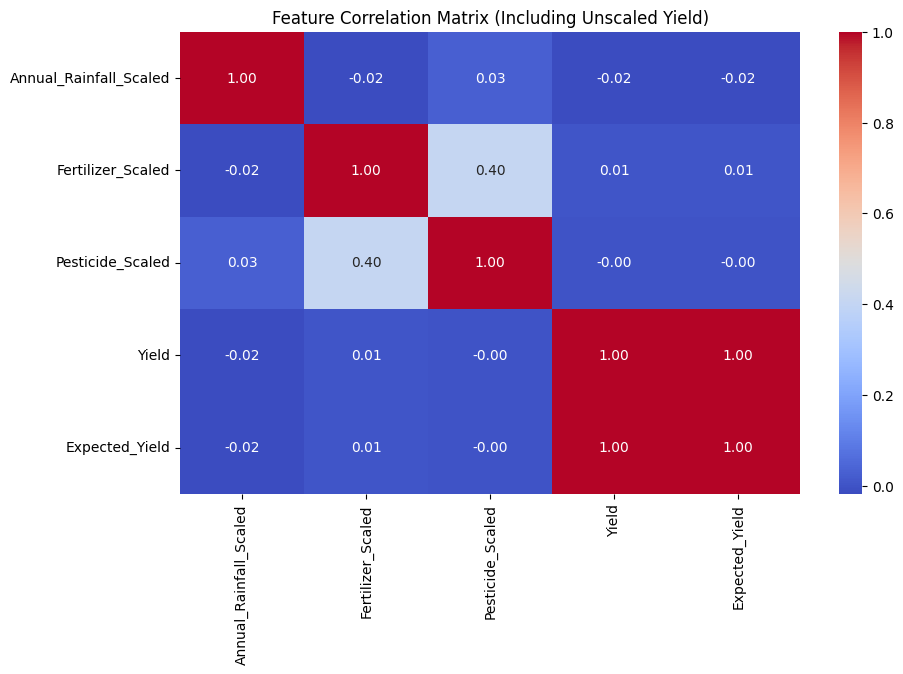

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df[[col for col in df.columns if "_Scaled" in col] + ['Yield','Expected_Yield']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix (Including Unscaled Yield)")
plt.show()

In [ ]:
import pandas as pd
columns_to_drop = [
    "Annual_Rainfall",
    "Fertilizer_Total",
    "Pesticide_Total",
    "Crop_Year",
    "Fertilizer",
    "Pesticide",
    'Production',
    "Area"
]
df = df.drop(columns=columns_to_drop, errors='ignore')
print(df.head())

           Crop      Season  State   Yield  Expected_Yield  \
0      Arecanut  Whole Year  Assam    0.80            0.77   
1     Arhar/Tur      Kharif  Assam    0.71            0.71   
2   Castor seed      Kharif  Assam    0.24            0.03   
3       Coconut  Whole Year  Assam 5238.05         6456.30   
4  Cotton(lint)      Kharif  Assam    0.42            0.46   

   Annual_Rainfall_Scaled  Fertilizer_Scaled  Pesticide_Scaled  
0                   -0.05              -1.47              0.50  
1                    0.77              -1.57              0.46  
2                    0.76              -1.58              0.46  
3                    0.29              -1.54              0.52  
4                    0.67              -1.56              0.50  


In [ ]:
import pandas as pd

numerical_df = df.select_dtypes(include=['number'])

correlations = numerical_df.corr()['Yield'].abs().sort_values(ascending=False)
print(f"Correlations with Yield (Numerical Features Only):\n{correlations}")

for crop in df['Crop'].unique():
    crop_data = df[df['Crop'] == crop]
    numerical_crop_data = crop_data.select_dtypes(include=['number'])
    correlations = numerical_crop_data.corr()['Yield'].abs().sort_values(ascending=False)
    print(f"Correlation with Yield for {crop}:\n{correlations}")

Correlations with Yield (Numerical Features Only):
Yield                    1.00
Expected_Yield           1.00
Annual_Rainfall_Scaled   0.02
Fertilizer_Scaled        0.01
Pesticide_Scaled         0.00
Name: Yield, dtype: float64
Correlation with Yield for Arecanut:
Yield                    1.00
Expected_Yield           0.98
Annual_Rainfall_Scaled   0.30
Fertilizer_Scaled        0.23
Pesticide_Scaled         0.15
Name: Yield, dtype: float64
Correlation with Yield for Arhar/Tur:
Yield                    1.00
Expected_Yield           0.90
Fertilizer_Scaled        0.17
Pesticide_Scaled         0.14
Annual_Rainfall_Scaled   0.11
Name: Yield, dtype: float64
Correlation with Yield for Castor seed:
Yield                    1.00
Expected_Yield           0.96
Annual_Rainfall_Scaled   0.10
Pesticide_Scaled         0.07
Fertilizer_Scaled        0.05
Name: Yield, dtype: float64
Correlation with Yield for Coconut:
Yield                    1.00
Expected_Yield           0.98
Annual_Rainfall_Scaled   0

In [ ]:
import pandas as pd
import plotly.express as px

# Compute correlation per crop with Yield and other scaled features
df_crop_corr = df.groupby("Crop")[[col for col in df.columns if "_Scaled" in col] + ['Yield']].corrwith(df["Yield"]).unstack().reset_index()

# Ensure all crops are included in the DataFrame (no missing rows)
df_crop_corr.columns = ["Crop", "Feature", "Correlation"]

# Pivot the data to switch axes (Features on bottom, Crops on left)
df_pivot = df_crop_corr.pivot(index="Feature", columns="Crop", values="Correlation")

# Fill any missing values in the pivot table with 0
df_pivot = df_pivot.fillna(0)

# Create a Plotly heatmap
fig = px.imshow(df_pivot,
                color_continuous_scale='Viridis',  # Use a valid colorscale
                title="Heatmap Showing Feature-wise Correlation of Crops with Scaled Variables",
                labels={"x": "Features", "y": "Crops", "color": "Correlation"},
                aspect="auto")

fig.update_layout(
    height=800,  # Increase height for better visibility
    width=1200,  # Increase width for more room
    margin=dict(l=40, r=40, t=40, b=40),  # Reduce the margins
    title={
        'text': "Heatmap Showing Feature-wise Correlation of Crops with Scaled Variables",
        'font': {'size': 20, 'weight': 'bold'},  # Make title larger and bold
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title in the center
    },
    xaxis=dict(
        title={'text': '<b>Features</b>', 'font': {'size': 14, 'weight': 'bold'}},  # Make x-axis title bold
        tickangle=0,  # Set x-axis labels to be horizontal
        tickfont=dict(size=12, weight='bold')  # Make x-axis feature names bold
    ),
    yaxis=dict(
        title={'text': '<b>Crops</b>', 'font': {'size': 14, 'weight': 'bold'}},  # Make y-axis title bold
        tickangle=0,  # Keep y-axis labels straight
        tickmode='array',  # Force the y-axis to use array mode for the ticks
        tickvals=df_pivot.index.tolist(),  # Ensure all features are labeled
        ticktext=df_pivot.index.tolist(),  # Ensure all features are labeled
        tickfont=dict(size=12, weight='bold')  # Make y-axis crop names bold
    ),
    font=dict(
        family="Arial",  # You can change to another font family if desired
        size=12,  # Overall font size for the text
        color="black"  # Text color
    )
)

# Show the plot
fig.show()


**CALCULATE VIF FOR MULTICOLLINEARITY REMOVAL**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

numerical_features = ['Annual_Rainfall_Scaled', 'Fertilizer_Scaled', 'Pesticide_Scaled']
X = df[numerical_features]
X = X.assign(constant=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data[vif_data['Feature'] != 'constant']
print(vif_data)

                  Feature  VIF
0  Annual_Rainfall_Scaled 1.00
1       Fertilizer_Scaled 1.20
2        Pesticide_Scaled 1.20


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

numerical_features = ['Annual_Rainfall_Scaled', 'Fertilizer_Scaled', 'Pesticide_Scaled','Yield','Expected_Yield']
X = df[numerical_features]
X = X.assign(constant=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data[vif_data['Feature'] != 'constant']
print(vif_data)

                  Feature    VIF
0  Annual_Rainfall_Scaled   1.00
1       Fertilizer_Scaled   1.20
2        Pesticide_Scaled   1.20
3                   Yield 137.66
4          Expected_Yield 137.66


In [ ]:
print(df.dtypes)

Crop                       object
Season                     object
State                      object
Yield                     float64
Expected_Yield            float64
Annual_Rainfall_Scaled    float64
Fertilizer_Scaled         float64
Pesticide_Scaled          float64
dtype: object


In [ ]:
import pandas as pd
columns_to_drop = [
    "Expected_Yield"
]
df = df.drop(columns=columns_to_drop, errors='ignore')
print(df.head())

           Crop      Season  State   Yield  Annual_Rainfall_Scaled  \
0      Arecanut  Whole Year  Assam    0.80                   -0.05   
1     Arhar/Tur      Kharif  Assam    0.71                    0.77   
2   Castor seed      Kharif  Assam    0.24                    0.76   
3       Coconut  Whole Year  Assam 5238.05                    0.29   
4  Cotton(lint)      Kharif  Assam    0.42                    0.67   

   Fertilizer_Scaled  Pesticide_Scaled  
0              -1.47              0.50  
1              -1.57              0.46  
2              -1.58              0.46  
3              -1.54              0.52  
4              -1.56              0.50  


In [ ]:
print(df.columns)

Index(['Crop', 'Season', 'State', 'Yield', 'Annual_Rainfall_Scaled',
       'Fertilizer_Scaled', 'Pesticide_Scaled'],
      dtype='object')


**KFOLD**

In [ ]:
from google.colab import files

In [ ]:
from sklearn.model_selection import KFold, train_test_split
from skopt import BayesSearchCV
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tqdm import tqdm
from sklearn.svm import SVR
import json
from skopt.space import Categorical, Integer, Real
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="skopt")

# ================== DATA PREP ================== #
# Initialize storage for splits
crop_splits = {}

# Stratified split per crop
for crop in df["Crop"].unique():
    crop_df = df[df["Crop"] == crop].copy()

    # Create stratify label (skip if no season/state variation)
    if len(crop_df["State"].unique()) == 1 and len(crop_df["Season"].unique()) == 1:
        # No stratification needed for single state/season crops
        train_df, test_df = train_test_split(crop_df, test_size=0.2, random_state=42)
    else:
        crop_df["Stratify_Label"] = crop_df["State"] + "_" + crop_df["Season"]
        label_counts = crop_df["Stratify_Label"].value_counts()
        valid_labels = label_counts[label_counts >= 2].index
        crop_df = crop_df[crop_df["Stratify_Label"].isin(valid_labels)]

        # Skip if no valid splits after filtering
        if len(crop_df) < 5:
            print(f"⚠️ Skipping {crop} (insufficient samples after stratification)")
            continue

        train_df, test_df = train_test_split(
            crop_df.drop(columns=["Stratify_Label"]),
            test_size=0.2,
            stratify=crop_df["Stratify_Label"],
            random_state=42
        )

    # Store splits only if we have data
    if len(train_df) > 0 and len(test_df) > 0:
        crop_splits[crop] = {"train": train_df, "test": test_df}

# One-hot encoding
for crop, splits in crop_splits.items():
    # Encode train
    train_df = pd.get_dummies(splits["train"], columns=["State", "Season"], drop_first=True)
    # Encode test (align columns)
    test_df = pd.get_dummies(splits["test"], columns=["State", "Season"], drop_first=True)
    missing_cols = set(train_df.columns) - set(test_df.columns)
    for col in missing_cols:
        test_df[col] = 0
    test_df = test_df[train_df.columns]

    crop_splits[crop]["train"] = train_df
    crop_splits[crop]["test"] = test_df

# ================== MODEL SETUP ================== #
models_with_params = {
    "Random Forest": (RandomForestRegressor(random_state=42), {
        'n_estimators': Integer(50, 500),
        'max_depth': Integer(5, 50),
        'min_samples_split': Integer(2, 10),
    }),
    "Gradient Boosting": (GradientBoostingRegressor(random_state=42), {
        'n_estimators': Integer(50, 500),
        'learning_rate': Real(0.01, 0.2),
    }),
    "XGBoost": (XGBRegressor(random_state=42, objective="reg:squarederror"), {
        'n_estimators': Integer(50, 500),
        'learning_rate': Real(0.01, 0.2),
    }),
    "CatBoost": (CatBoostRegressor(verbose=0, random_state=42), {
        'depth': Integer(6, 10),
        'learning_rate': Real(0.01, 0.2),
        'iterations': Integer(50, 500),
    }),
    "SVM": (SVR(), {
        'C': Real(0.1, 1000, prior='log-uniform'),
        'epsilon': Real(0.01, 0.1),
        'kernel': Categorical(['linear', 'rbf']),
    }),
    "MLP": (MLPRegressor(random_state=42, max_iter=1000), {
        'hidden_layer_sizes': Integer(50, 200),
        'alpha': Real(0.0001, 0.1, prior='log-uniform'),
        'learning_rate_init': Real(0.001, 0.1),
    })
}

# ================== TRAINING ================== #
def evaluate_kfold(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    val_preds = np.zeros(len(y))

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train = y.iloc[train_idx]

        model_clone = model.__class__(**model.get_params())
        model_clone.fit(X_train, y_train)
        val_preds[val_idx] = model_clone.predict(X_val)

    return {
        "R²": r2_score(y, val_preds),
        "MSE": mean_squared_error(y, val_preds),
        "RMSE": np.sqrt(mean_squared_error(y, val_preds)),
        "MAE": mean_absolute_error(y, val_preds),
        "y_pred": val_preds
    }

# ... (keep all your imports and initial setup code)

def train_models_with_kfold():
    results = []
    predictions_list = []
    best_models_params = {}

    for crop, splits in tqdm(crop_splits.items(), desc="Processing crops"):
        X_train = splits["train"].drop(columns=["Crop", "Yield"])
        y_train = splits["train"]["Yield"]
        num_rows = len(X_train)

        best_model_for_crop = None
        best_r2 = -np.inf

        for model_name, (model, param_space) in models_with_params.items():
            try:
                n_splits = min(5, max(3, num_rows // 20))

                opt = BayesSearchCV(
                    model,
                    param_space,
                    n_iter=15,
                    cv=n_splits,
                    scoring='r2',
                    n_jobs=-1,
                    random_state=42
                )
                opt.fit(X_train, y_train)

                metrics = evaluate_kfold(opt.best_estimator_, X_train, y_train, n_splits=n_splits)

                # Convert numpy values to native Python types for JSON serialization
                serializable_metrics = {
                    "R²": float(metrics["R²"]),
                    "MSE": float(metrics["MSE"]),
                    "RMSE": float(metrics["RMSE"]),
                    "MAE": float(metrics["MAE"]),
                    "y_pred": metrics["y_pred"].tolist()  # Convert ndarray to list
                }

                results.append([
                    crop, model_name,
                    serializable_metrics["R²"],
                    serializable_metrics["MSE"],
                    serializable_metrics["RMSE"],
                    serializable_metrics["MAE"]
                ])

                predictions_list.extend(zip(
                    [crop] * len(y_train),
                    [model_name] * len(y_train),
                    y_train.values,
                    metrics["y_pred"]
                ))

                if serializable_metrics["R²"] > best_r2:
                    best_r2 = serializable_metrics["R²"]
                    best_model_for_crop = {
                        "model": model_name,
                        "params": opt.best_params_,
                        "metrics": {
                            "R²": serializable_metrics["R²"],
                            "MSE": serializable_metrics["MSE"],
                            "RMSE": serializable_metrics["RMSE"],
                            "MAE": serializable_metrics["MAE"]
                        }
                    }

            except Exception as e:
                print(f"❌ {crop} - {model_name} failed: {str(e)}")
                continue

        if best_model_for_crop:
            # Convert numpy types in params to native Python types
            sanitized_params = {}
            for k, v in best_model_for_crop["params"].items():
                if isinstance(v, (np.integer, np.floating)):
                    sanitized_params[k] = int(v) if isinstance(v, np.integer) else float(v)
                else:
                    sanitized_params[k] = v
            best_model_for_crop["params"] = sanitized_params

            best_models_params[crop] = best_model_for_crop

    # Save results
    results_df = pd.DataFrame(results, columns=["Crop", "Model", "R²", "MSE", "RMSE", "MAE"])
    predictions_df = pd.DataFrame(predictions_list, columns=["Crop", "Model", "Actual_Yield", "Predicted_Yield"])

    results_df.to_csv("model_performance_with_kfold.csv", index=False)
    predictions_df.to_csv("actual_vs_predicted.csv", index=False)

    # Save with JSON-compatible types
    with open("best_models_params.json", "w") as f:
        json.dump(best_models_params, f, indent=4, default=lambda x: float(x) if isinstance(x, (np.floating, np.integer)) else str(x))

    files.download("best_models_params.json")
    return results_df, best_models_params

# Execute
results_df_kfold, best_models_params = train_models_with_kfold()

Processing crops:   6%|▌         | 3/51 [13:59<3:47:19, 284.16s/it]/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilaye

NameError: name 'files' is not defined

In [ ]:
# 📌 Load the K-Fold Model Performance Results
results_df_kfold = pd.read_csv("model_performance_with_kfold.csv")

# 📌 Extract Best Models for Each Crop (Based on Highest R²)
best_models_kfold = results_df_kfold.loc[results_df_kfold.groupby("Crop")["R²"].idxmax()]

# 📌 Save Best Models to CSV
best_models_kfold.to_csv("best_models_per_crop_kfold.csv", index=False)

print("\n✅ Best models for each crop saved in 'best_models_per_crop_kfold.csv'.")

try:
    from google.colab import files
    files.download("best_models_per_crop_kfold.csv")
except ImportError:
    print("\nFile downloads are only available in Google Colab.")



✅ Best models for each crop saved in 'best_models_per_crop_kfold.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file
results_df_kfold.to_csv('model_performance_with_kfold.csv', index=False)

# Download the file
files.download('model_performance_with_kfold.csv')CHHHH

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
results_df_kfold

Crop              Model   R²  MSE  RMSE  MAE
0    Arecanut      Random Forest 0.75 1.39  1.18 0.62
1    Arecanut  Gradient Boosting 0.74 1.43  1.20 0.68
2    Arecanut            XGBoost 0.69 1.73  1.32 0.61
3    Arecanut           CatBoost 0.77 1.31  1.14 0.57
4    Arecanut                SVM 0.72 1.54  1.24 0.59
..        ...                ...  ...  ...   ...  ...
301      Moth  Gradient Boosting 0.61 0.02  0.16 0.12
302      Moth            XGBoost 0.44 0.03  0.19 0.14
303      Moth           CatBoost 0.64 0.02  0.15 0.12
304      Moth                SVM 0.72 0.02  0.13 0.10
305      Moth                MLP 0.72 0.02  0.13 0.10

[306 rows x 6 columns]

In [ ]:
best_models_kfold

Crop              Model   R²        MSE    RMSE     MAE
3                 Arecanut           CatBoost 0.77       1.31    1.14    0.57
11               Arhar/Tur                MLP 0.84       0.02    0.13    0.09
134                  Bajra            XGBoost 0.96       1.44    1.20    0.35
209                 Banana                MLP 0.94      21.16    4.60    3.19
281                 Barley                MLP 0.91       0.08    0.28    0.18
195           Black pepper           CatBoost 0.84       0.11    0.33    0.21
203              Cashewnut                MLP 0.74       0.03    0.18    0.13
13             Castor seed  Gradient Boosting 0.90       0.02    0.14    0.10
23                 Coconut                MLP 0.84 1884503.52 1372.77 1002.18
148              Coriander                SVM 0.82       0.09    0.30    0.17
29            Cotton(lint)                MLP 0.74       0.29    0.54    0.37
299          Cowpea(Lobia)                MLP 0.83       0.04    0.19    0.14
35            Dry chillies                MLP 0.53       2.62    1.62    0.89
154                 Garlic                SVM 0.84       2.19    1.48    0.84
156                 Ginger      Random Forest 0.70      13.45    3.67    2.04
40                    Gram                SVM 0.58       0.04    0.20    0.14
166              Groundnut                SVM 0.83       0.07    0.26    0.18
172             Horse-gram                SVM 0.71       0.01    0.12    0.08
178                  Jowar                SVM 0.62       0.10    0.31    0.18
47                    Jute                MLP 0.89       2.73    1.65    1.18
53                 Linseed                MLP 0.85       0.01    0.08    0.06
57                   Maize           CatBoost 0.51       1.80    1.34    0.56
225                 Masoor           CatBoost 0.58       0.02    0.14    0.10
64                   Mesta                SVM 0.88       1.20    1.09    0.67
233      Moong(Green Gram)                MLP 0.74       0.02    0.13    0.09
305                   Moth                MLP 0.72       0.02    0.13    0.10
257             Niger seed                MLP 0.95       0.00    0.05    0.04
70                   Onion                SVM 0.89       7.14    2.67    1.92
73      Other  Rabi pulses  Gradient Boosting 0.81       0.04    0.21    0.14
290          Other Cereals            XGBoost 0.34       0.07    0.26    0.17
234    Other Kharif pulses      Random Forest 0.71       0.03    0.17    0.13
143            Other_Crops                MLP 0.80       0.15    0.39    0.19
263  Peas & beans (Pulses)                MLP 0.92       0.25    0.50    0.26
82                  Potato                SVM 0.85       5.65    2.38    1.65
181                   Ragi  Gradient Boosting 0.87       0.06    0.24    0.16
89       Rapeseed &Mustard                MLP 0.92       0.02    0.15    0.11
95                    Rice                MLP 0.89       0.06    0.25    0.19
269              Safflower                MLP 0.68       0.02    0.12    0.09
240               Sannhamp      Random Forest 0.97       0.07    0.26    0.15
215                Sesamum                MLP 0.83       0.01    0.09    0.06
101          Small millets                MLP 0.80       0.02    0.14    0.09
220               Soyabean                SVM 0.60       0.06    0.23    0.17
187              Sugarcane  Gradient Boosting 0.91      80.13    8.95    6.35
274              Sunflower                SVM 0.74       0.05    0.23    0.16
105           Sweet potato           CatBoost 0.72       7.14    2.67    1.81
108                Tapioca      Random Forest 0.95       6.85    2.62    1.89
119                Tobacco                MLP 0.85       0.43    0.65    0.42
125               Turmeric                MLP 0.63       4.22    2.05    0.99
251                   Urad                MLP 0.76       0.01    0.12    0.08
131                  Wheat                MLP 0.95       0.06    0.25    0.18
286         other oilseeds                SV

In [ ]:
import pandas as pd
import json
from sklearn.metrics import r2_score

# 📌 Load Best Models per Crop
best_models_kfold = pd.read_csv("best_models_per_crop_kfold.csv")

# 📌 Load Predictions from K-Fold CV
predictions_df_kfold = pd.read_csv("actual_vs_predicted.csv")

# 📌 Merge to keep only the best models' predictions
actual_vs_best_predictions_kfold = predictions_df_kfold.merge(
    best_models_kfold[['Crop', 'Model']], on=['Crop', 'Model'], how='inner'
)

# 📌 Compute Overall R² Score
y_actual_kfold = actual_vs_best_predictions_kfold["Actual_Yield"]
y_predicted_kfold = actual_vs_best_predictions_kfold["Predicted_Yield"]

overall_r2_kfold = r2_score(y_actual_kfold, y_predicted_kfold)

print(f"✅ Overall R² Score (Best Models with K-Fold CV): {overall_r2_kfold:.4f}")
print(f"✅ Average R² Score (Best Models with K-Fold CV): {best_models_kfold['R²'].mean():.4f}")

✅ Overall R² Score (Best Models with K-Fold CV): 0.9778
✅ Average R² Score (Best Models with K-Fold CV): 0.7913


**TEST_TRAIN_SPLIT**

In [ ]:
import json
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tqdm import tqdm
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

def get_model_instance(model_name, params):
    model_classes = {
        "XGBoost": XGBRegressor,
        "CatBoost": CatBoostRegressor,
        "Gradient Boosting": GradientBoostingRegressor,
        "Random Forest": RandomForestRegressor,
        "SVM": SVR,
        "MLPRegressor": MLPRegressor
    }
    return model_classes.get(model_name, XGBRegressor)(**params)

def evaluate_per_crop_stratified():
    # Load best models if not in memory
    if 'best_models_params' not in globals():
        with open("best_models_params.json", "r") as f:
            best_models_params = json.load(f)
    else:
        best_models_params = globals()['best_models_params']

    results = []
    predictions_list = []

    for crop, splits in tqdm(crop_splits.items(), desc="Final Evaluation"):
        X_test = splits["test"].drop(columns=["Crop", "Yield"])
        y_test = splits["test"]["Yield"]

        if crop not in best_models_params:
            print(f"⚠️ No best model for {crop}")
            continue

        best_info = best_models_params[crop]
        model = get_model_instance(best_info["model"], best_info["params"])

        # Train on full train set
        model.fit(
            splits["train"].drop(columns=["Crop", "Yield"]),
            splits["train"]["Yield"]
        )

        # Predict on test set
        y_pred = model.predict(X_test)

        # Convert metrics to JSON-serializable types
        r2 = float(r2_score(y_test, y_pred))
        mse = float(mean_squared_error(y_test, y_pred))
        rmse = float(np.sqrt(mse))
        mae = float(mean_absolute_error(y_test, y_pred))

        results.append([crop, best_info["model"], r2, mse, rmse, mae])
        predictions_list.extend(zip(
            [crop]*len(y_test),
            [best_info["model"]]*len(y_test),
            y_test.values,
            y_pred
        ))

    results_df = pd.DataFrame(results, columns=["Crop", "Model", "R²", "MSE", "RMSE", "MAE"])
    predictions_df = pd.DataFrame(predictions_list, columns=["Crop", "Model", "Actual_Yield", "Predicted_Yield"])

    results_df.to_csv("final_model_performance_stratified_per_crop.csv", index=False)
    predictions_df.to_csv("final_actual_vs_predicted_stratified_per_crop.csv", index=False)

    return results_df, predictions_df

# Run evaluation
results_df, predictions_df = evaluate_per_crop_stratified()

Final Evaluation:   0%|          | 0/51 [00:00<?, ?it/s]

0:	learn: 2.3223004	total: 1.95ms	remaining: 922ms
1:	learn: 2.2764584	total: 2.53ms	remaining: 595ms
2:	learn: 2.2363432	total: 3.91ms	remaining: 612ms
3:	learn: 2.1874095	total: 4.1ms	remaining: 480ms
4:	learn: 2.1436828	total: 5.45ms	remaining: 510ms
5:	learn: 2.1109380	total: 6.78ms	remaining: 528ms
6:	learn: 2.0687238	total: 7.65ms	remaining: 509ms
7:	learn: 2.0175006	total: 7.84ms	remaining: 456ms
8:	learn: 1.9721190	total: 9.28ms	remaining: 478ms
9:	learn: 1.9321401	total: 10ms	remaining: 464ms
10:	learn: 1.8978907	total: 10.2ms	remaining: 427ms
11:	learn: 1.8625679	total: 10.3ms	remaining: 396ms
12:	learn: 1.8324051	total: 11.7ms	remaining: 413ms
13:	learn: 1.7947450	total: 12.2ms	remaining: 399ms
14:	learn: 1.7592341	total: 13.4ms	remaining: 410ms
15:	learn: 1.7337960	total: 15.6ms	remaining: 445ms
16:	learn: 1.7018938	total: 17.4ms	remaining: 466ms
17:	learn: 1.6677846	total: 18.3ms	remaining: 462ms
18:	learn: 1.6372742	total: 19.7ms	remaining: 471ms
19:	learn: 1.6161391	tota

Final Evaluation:   2%|▏         | 1/51 [00:00<00:36,  1.37it/s]

447:	learn: 0.0470849	total: 578ms	remaining: 32.2ms
448:	learn: 0.0469378	total: 580ms	remaining: 31ms
449:	learn: 0.0468597	total: 581ms	remaining: 29.7ms
450:	learn: 0.0467187	total: 586ms	remaining: 28.6ms
451:	learn: 0.0466247	total: 588ms	remaining: 27.3ms
452:	learn: 0.0464382	total: 590ms	remaining: 26ms
453:	learn: 0.0463067	total: 592ms	remaining: 24.8ms
454:	learn: 0.0461262	total: 593ms	remaining: 23.5ms
455:	learn: 0.0458721	total: 597ms	remaining: 22.3ms
456:	learn: 0.0457084	total: 600ms	remaining: 21ms
457:	learn: 0.0456295	total: 605ms	remaining: 19.8ms
458:	learn: 0.0454531	total: 613ms	remaining: 18.7ms
459:	learn: 0.0452736	total: 616ms	remaining: 17.4ms
460:	learn: 0.0451222	total: 622ms	remaining: 16.2ms
461:	learn: 0.0449195	total: 624ms	remaining: 14.9ms
462:	learn: 0.0446849	total: 625ms	remaining: 13.5ms
463:	learn: 0.0446137	total: 626ms	remaining: 12.1ms
464:	learn: 0.0444815	total: 628ms	remaining: 10.8ms
465:	learn: 0.0443020	total: 628ms	remaining: 9.44ms

Final Evaluation:  10%|▉         | 5/51 [00:01<00:08,  5.25it/s]

[18:01:39] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.

[18:01:39] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.

[18:01:39] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.



Final Evaluation:  18%|█▊        | 9/51 [00:01<00:04,  9.51it/s]

[18:01:39] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.

[18:01:39] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.

0:	learn: 1.8940177	total: 5.11ms	remaining: 2.36s
1:	learn: 1.8699676	total: 7.04ms	remaining: 1.62s
2:	learn: 1.8457102	total: 9.06ms	remaining: 1.39s
3:	learn: 1.8256438	total: 11.1ms	remaining: 1.27s
4:	learn: 1.8040741	total: 12.9ms	remaining: 1.18s
5:	learn: 1.7802564	total: 14.7ms	remaining: 1.12s
6:	learn: 1.7652336	total: 16.5ms	remaining: 1.07s
7:	learn: 1.7482953	total: 17.7ms	remaining: 1s
8:	learn: 1.7281198	total: 19.4ms	remaining: 981ms
9:	learn: 1.7074634	total: 21.2ms	remaining: 960ms
10:	learn: 1.6886337	total: 23ms	remaining: 947ms
11:	learn: 1.6770576	total: 24.6ms	remaining: 926ms
12:	learn: 1.6578588	total: 26.4ms	remaining: 914ms
13:	learn: 1.6390543	total: 28.1ms	remaining: 901ms
14:	learn: 1.6221005	total: 29.8ms	remaining: 892ms

Final Evaluation:  29%|██▉       | 15/51 [00:03<00:08,  4.07it/s]

[18:01:41] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.

[18:01:41] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.



Final Evaluation:  33%|███▎      | 17/51 [00:04<00:07,  4.70it/s]

[18:01:42] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.

0:	learn: 4.8615716	total: 1.81ms	remaining: 837ms
1:	learn: 4.7154719	total: 3.36ms	remaining: 776ms
2:	learn: 4.5549424	total: 5.01ms	remaining: 770ms
3:	learn: 4.4323167	total: 6.61ms	remaining: 760ms
4:	learn: 4.3025542	total: 8.06ms	remaining: 740ms
5:	learn: 4.1985271	total: 9.62ms	remaining: 734ms
6:	learn: 4.0697462	total: 11.2ms	remaining: 731ms
7:	learn: 3.8874429	total: 12.6ms	remaining: 719ms
8:	learn: 3.7624923	total: 13.8ms	remaining: 699ms
9:	learn: 3.6769650	total: 15ms	remaining: 682ms
10:	learn: 3.5585059	total: 16.2ms	remaining: 668ms
11:	learn: 3.4902847	total: 17.5ms	remaining: 658ms
12:	learn: 3.3785744	total: 21.1ms	remaining: 733ms
13:	learn: 3.2576553	total: 22.5ms	remaining: 722ms
14:	learn: 3.2053969	total: 23.8ms	remaining: 712ms
15:	learn: 3.1579881	total: 25.1ms	remaining: 703ms
16:	learn: 3.0672287	total: 26.3ms	remaining: 692ms
17:	learn:

Final Evaluation:  35%|███▌      | 18/51 [00:04<00:10,  3.11it/s]

370:	learn: 0.2180624	total: 476ms	remaining: 119ms
371:	learn: 0.2159222	total: 480ms	remaining: 119ms
372:	learn: 0.2152055	total: 482ms	remaining: 118ms
373:	learn: 0.2144591	total: 489ms	remaining: 118ms
374:	learn: 0.2125441	total: 491ms	remaining: 117ms
375:	learn: 0.2113456	total: 493ms	remaining: 115ms
376:	learn: 0.2101701	total: 494ms	remaining: 114ms
377:	learn: 0.2085398	total: 495ms	remaining: 113ms
378:	learn: 0.2082151	total: 497ms	remaining: 111ms
379:	learn: 0.2078696	total: 498ms	remaining: 110ms
380:	learn: 0.2064708	total: 499ms	remaining: 109ms
381:	learn: 0.2052898	total: 500ms	remaining: 107ms
382:	learn: 0.2047856	total: 502ms	remaining: 106ms
383:	learn: 0.2033108	total: 503ms	remaining: 105ms
384:	learn: 0.2021615	total: 504ms	remaining: 103ms
385:	learn: 0.2013904	total: 505ms	remaining: 102ms
386:	learn: 0.2006301	total: 506ms	remaining: 101ms
387:	learn: 0.1999066	total: 507ms	remaining: 99.3ms
388:	learn: 0.1984413	total: 508ms	remaining: 98ms
389:	learn: 

Final Evaluation:  41%|████      | 21/51 [00:05<00:07,  3.81it/s]

[18:01:43] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.

[18:01:43] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.

[18:01:43] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.



Final Evaluation:  45%|████▌     | 23/51 [00:06<00:05,  4.76it/s]

[18:01:43] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.



Final Evaluation:  63%|██████▎   | 32/51 [00:07<00:03,  5.54it/s]

0:	learn: 0.7769033	total: 811us	remaining: 305ms
1:	learn: 0.7100047	total: 1.52ms	remaining: 286ms
2:	learn: 0.6499923	total: 1.93ms	remaining: 241ms
3:	learn: 0.5956288	total: 2.54ms	remaining: 237ms
4:	learn: 0.5469140	total: 2.74ms	remaining: 204ms
5:	learn: 0.5145586	total: 3.34ms	remaining: 206ms
6:	learn: 0.4774842	total: 3.93ms	remaining: 208ms
7:	learn: 0.4536857	total: 4.14ms	remaining: 191ms
8:	learn: 0.4264067	total: 4.71ms	remaining: 193ms
9:	learn: 0.3987831	total: 5.32ms	remaining: 195ms
10:	learn: 0.3695562	total: 5.7ms	remaining: 190ms
11:	learn: 0.3521090	total: 6ms	remaining: 182ms
12:	learn: 0.3240645	total: 6.62ms	remaining: 185ms
13:	learn: 0.3027179	total: 7.17ms	remaining: 186ms
14:	learn: 0.2846911	total: 7.74ms	remaining: 187ms
15:	learn: 0.2722191	total: 8.3ms	remaining: 187ms
16:	learn: 0.2601393	total: 8.89ms	remaining: 188ms
17:	learn: 0.2457128	total: 9.56ms	remaining: 191ms
18:	learn: 0.2321696	total: 10.1ms	remaining: 191ms
19:	learn: 0.2230633	total: 

Final Evaluation:  69%|██████▊   | 35/51 [00:07<00:02,  6.68it/s]

307:	learn: 0.0010191	total: 183ms	remaining: 40.9ms
308:	learn: 0.0010085	total: 183ms	remaining: 40.4ms
309:	learn: 0.0010025	total: 184ms	remaining: 39.9ms
310:	learn: 0.0009805	total: 185ms	remaining: 39.3ms
311:	learn: 0.0009625	total: 186ms	remaining: 38.7ms
312:	learn: 0.0009552	total: 186ms	remaining: 38.1ms
313:	learn: 0.0009464	total: 187ms	remaining: 37.5ms
314:	learn: 0.0009386	total: 187ms	remaining: 36.9ms
315:	learn: 0.0009246	total: 188ms	remaining: 36.3ms
316:	learn: 0.0009173	total: 189ms	remaining: 35.7ms
317:	learn: 0.0009025	total: 189ms	remaining: 35.2ms
318:	learn: 0.0008870	total: 190ms	remaining: 34.6ms
319:	learn: 0.0008664	total: 191ms	remaining: 34ms
320:	learn: 0.0008483	total: 191ms	remaining: 33.4ms
321:	learn: 0.0008348	total: 192ms	remaining: 32.8ms
322:	learn: 0.0008290	total: 192ms	remaining: 32.2ms
323:	learn: 0.0008246	total: 193ms	remaining: 31.6ms
324:	learn: 0.0008127	total: 194ms	remaining: 31ms
325:	learn: 0.0008030	total: 194ms	remaining: 30.4

Final Evaluation:  71%|███████   | 36/51 [00:07<00:02,  6.48it/s]

[18:01:45] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.

0:	learn: 0.2165369	total: 2.1ms	remaining: 970ms
1:	learn: 0.2144202	total: 5.62ms	remaining: 1.29s
2:	learn: 0.2122401	total: 8.25ms	remaining: 1.26s
3:	learn: 0.2103377	total: 9.14ms	remaining: 1.05s
4:	learn: 0.2086184	total: 10.7ms	remaining: 978ms
5:	learn: 0.2070203	total: 12.2ms	remaining: 931ms
6:	learn: 0.2054051	total: 12.6ms	remaining: 822ms
7:	learn: 0.2038991	total: 14.1ms	remaining: 801ms
8:	learn: 0.2023491	total: 15.6ms	remaining: 789ms
9:	learn: 0.2005696	total: 17.2ms	remaining: 779ms
10:	learn: 0.1989863	total: 17.7ms	remaining: 729ms
11:	learn: 0.1976168	total: 19.3ms	remaining: 725ms
12:	learn: 0.1961908	total: 20.9ms	remaining: 722ms
13:	learn: 0.1947896	total: 21.2ms	remaining: 682ms
14:	learn: 0.1933315	total: 22.8ms	remaining: 680ms
15:	learn: 0.1921100	total: 23.3ms	remaining: 652ms
16:	learn: 0.1908751	total: 24.9ms	remaining: 652ms
17:	learn

Final Evaluation:  75%|███████▍  | 38/51 [00:08<00:03,  4.03it/s]

393:	learn: 0.0665783	total: 591ms	remaining: 103ms
394:	learn: 0.0664081	total: 593ms	remaining: 102ms
395:	learn: 0.0662012	total: 595ms	remaining: 101ms
396:	learn: 0.0661028	total: 601ms	remaining: 100ms
397:	learn: 0.0660115	total: 603ms	remaining: 98.5ms
398:	learn: 0.0658453	total: 605ms	remaining: 97ms
399:	learn: 0.0657398	total: 607ms	remaining: 95.6ms
400:	learn: 0.0656068	total: 608ms	remaining: 94.1ms
401:	learn: 0.0655177	total: 610ms	remaining: 92.6ms
402:	learn: 0.0653983	total: 612ms	remaining: 91.1ms
403:	learn: 0.0652723	total: 613ms	remaining: 89.5ms
404:	learn: 0.0651455	total: 614ms	remaining: 88ms
405:	learn: 0.0649872	total: 616ms	remaining: 86.5ms
406:	learn: 0.0648497	total: 617ms	remaining: 84.9ms
407:	learn: 0.0646467	total: 619ms	remaining: 83.4ms
408:	learn: 0.0645266	total: 620ms	remaining: 81.9ms
409:	learn: 0.0644235	total: 622ms	remaining: 80.4ms
410:	learn: 0.0643419	total: 623ms	remaining: 78.9ms
411:	learn: 0.0641605	total: 625ms	remaining: 77.4ms
4

Final Evaluation:  80%|████████  | 41/51 [00:10<00:04,  2.26it/s]

[18:01:48] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.



Final Evaluation:  84%|████████▍ | 43/51 [00:11<00:02,  2.84it/s]

[18:01:49] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.

[18:01:49] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.



Final Evaluation:  88%|████████▊ | 45/51 [00:11<00:01,  3.75it/s]

[18:01:49] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.

[18:01:49] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.



Final Evaluation: 100%|██████████| 51/51 [00:11<00:00,  4.27it/s]


[18:01:49] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.

[18:01:49] WARNING: ../src/learner.cc:767: 
Parameters: { "hidden_layer_sizes", "learning_rate_init" } are not used.



In [ ]:
results_df

Crop              Model   R²        MSE    RMSE    MAE
0                Arecanut           CatBoost 0.97       0.13    0.36   0.25
1               Arhar/Tur                MLP 0.74       0.02    0.16   0.12
2             Castor seed  Gradient Boosting 0.95       0.01    0.11   0.08
3                 Coconut                MLP 0.90 1343982.43 1159.30 795.69
4            Cotton(lint)                MLP 0.68       0.35    0.59   0.36
5            Dry chillies                MLP 0.66       1.39    1.18   0.49
6                    Gram                SVM 0.53       0.04    0.20   0.14
7                    Jute                MLP 0.90       2.26    1.50   0.96
8                 Linseed                MLP 0.76       0.01    0.10   0.08
9                   Maize           CatBoost 0.86       0.78    0.88   0.47
10                  Mesta                SVM 0.82       1.84    1.36   0.80
11                  Onion                SVM 0.91       5.00    2.24   1.62
12     Other  Rabi pulses  Gradient Boosting 0.85       0.04    0.21   0.14
13                 Potato                SVM 0.86       5.22    2.28   1.57
14      Rapeseed &Mustard                MLP 0.93       0.03    0.17   0.10
15                   Rice                MLP 0.88       0.07    0.26   0.20
16          Small millets                MLP 0.81       0.02    0.15   0.09
17           Sweet potato           CatBoost 0.85       2.99    1.73   1.34
18                Tapioca      Random Forest 0.91       9.59    3.10   1.93
19                Tobacco                MLP 0.68       0.69    0.83   0.47
20               Turmeric                MLP 0.63       3.96    1.99   0.74
21                  Wheat                MLP 0.88       0.13    0.36   0.23
22                  Bajra            XGBoost 0.88       3.16    1.78   0.46
23            Other_Crops                MLP 0.54       0.48    0.69   0.21
24              Coriander                SVM 0.58       0.14    0.37   0.18
25                 Garlic                SVM 0.93       1.33    1.15   0.63
26                 Ginger      Random Forest 0.35      15.92    3.99   2.17
27              Groundnut                SVM 0.75       0.08    0.28   0.18
28             Horse-gram                SVM 0.81       0.01    0.10   0.07
29                  Jowar                SVM 0.67       0.07    0.26   0.17
30                   Ragi  Gradient Boosting 0.89       0.06    0.25   0.16
31              Sugarcane  Gradient Boosting 0.90      98.14    9.91   6.59
32           Black pepper           CatBoost 0.50       0.35    0.59   0.33
33              Cashewnut                MLP 0.50       0.04    0.21   0.10
34                 Banana                MLP 0.85      48.78    6.98   4.40
35                Sesamum                MLP 0.71       0.01    0.12   0.08
36               Soyabean                SVM 0.46       0.08    0.28   0.19
37                 Masoor           CatBoost 0.59       0.02    0.14   0.10
38      Moong(Green Gram)                MLP 0.68       0.02    0.14   0.10
39    Other Kharif pulses      Random Forest 0.75       0.02    0.16   0.13
40               Sannhamp      Random Forest 0.99       0.02    0.15   0.12
41                   Urad                MLP 0.66       0.03    0.17   0.09
42             Niger seed                MLP 0.92       0.00    0.06   0.05
43  Peas & beans (Pulses)                MLP 0.83       0.61    0.78   0.33
44              Safflower                MLP 0.29       0.04    0.21   0.14
45              Sunflower                SVM 0.74       0.04    0.21   0.14
46                 Barley                MLP 0.91       0.07    0.26   0.19
47         other oilseeds                SVM 0.77       2.69    1.64   0.80
48          Other Cereals            XGBoost 0.18       0.08    0.27   0.19
49          Cowpea(Lobia)                MLP 0.87       0.02    0.14   0.12
50                   Moth                MLP 0.73       0.01    0.12   0.10

In [ ]:
# Final R² Score Calculation
from sklearn.metrics import r2_score

y_actual = predictions_df["Actual_Yield"]
y_predicted = predictions_df["Predicted_Yield"]
final_r2 = r2_score(y_actual, y_predicted)

print(f"\n✅ Final R² Score on Stratified Test Data: {final_r2:.4f}")
print(f"✅ Average R² Score: {results_df['R²'].mean():.4f}")


✅ Final R² Score on Stratified Test Data: 0.9847
✅ Average R² Score: 0.7489


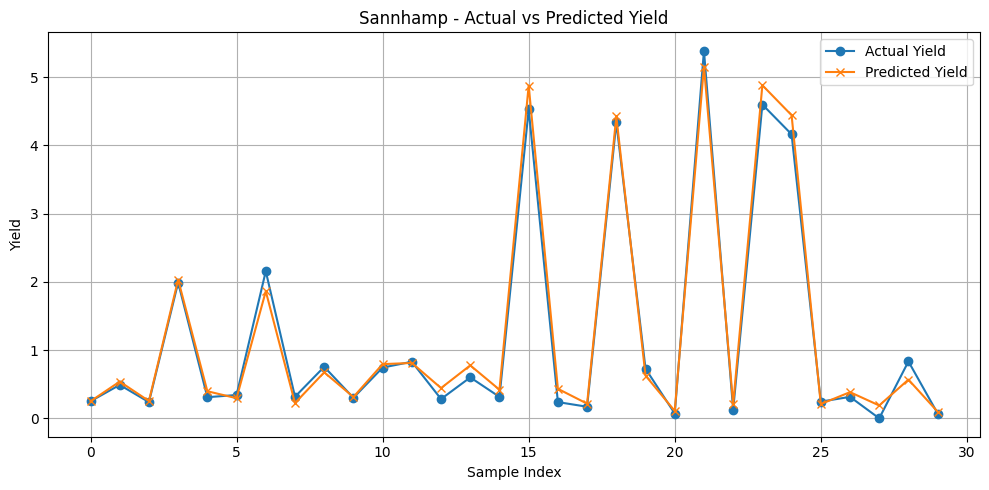

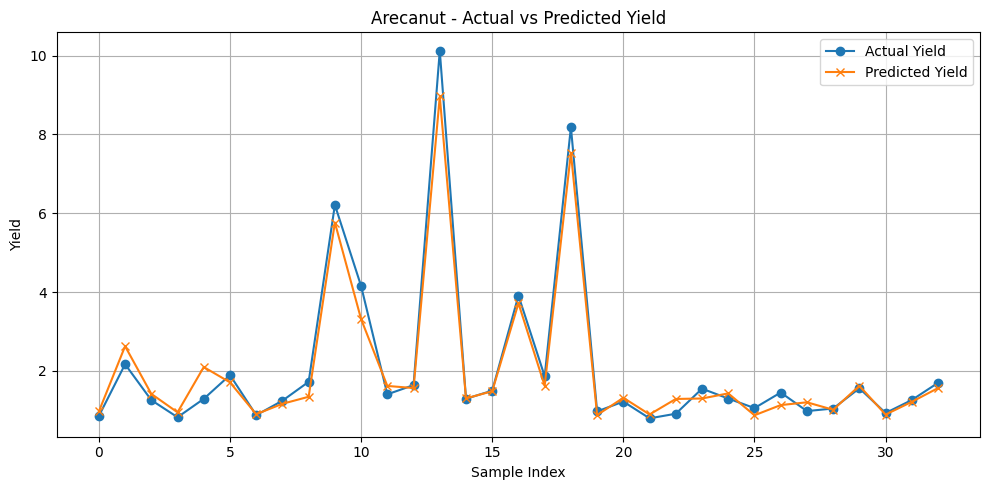

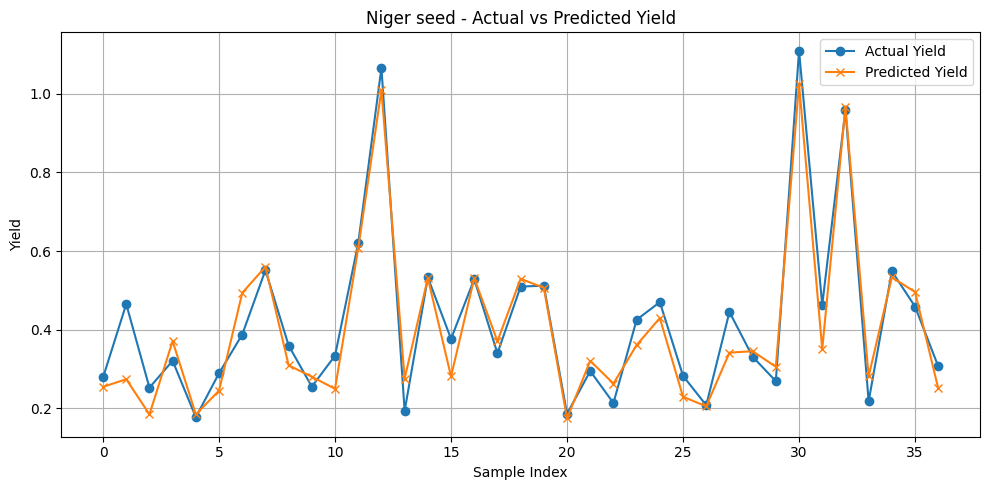

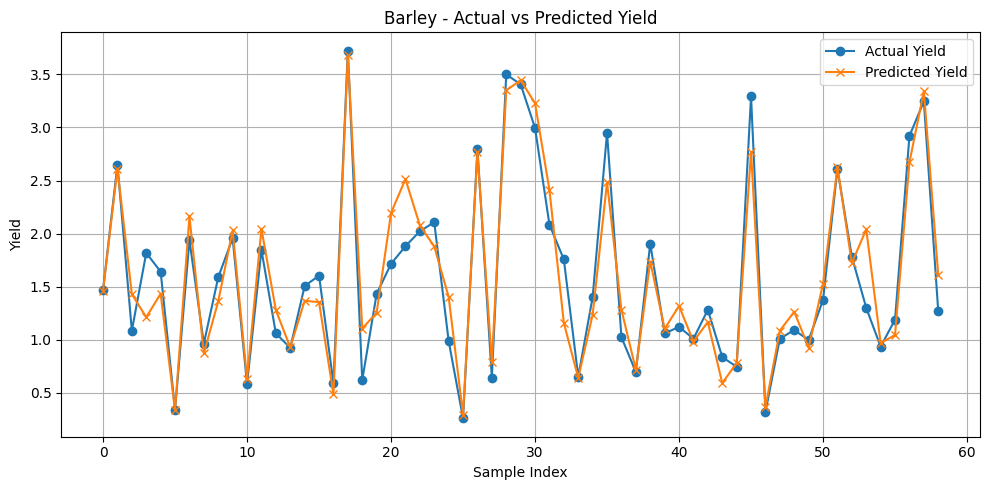

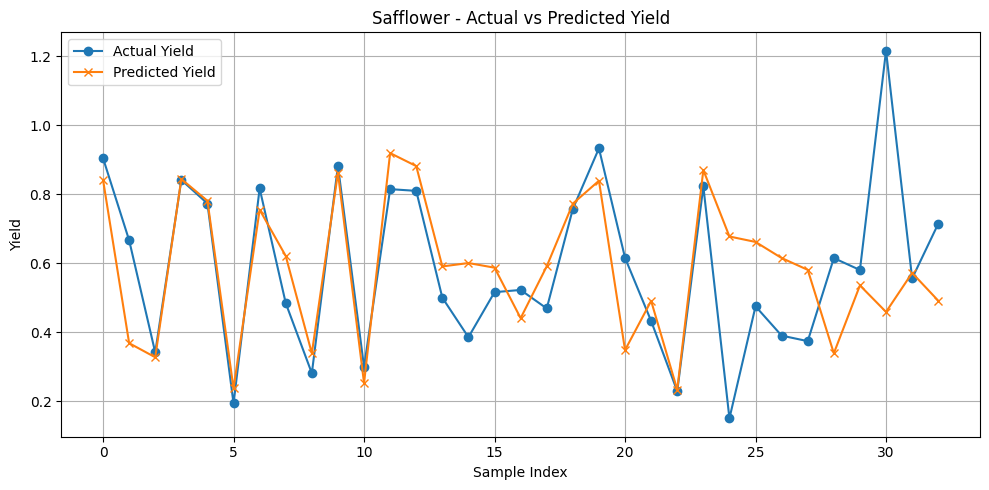

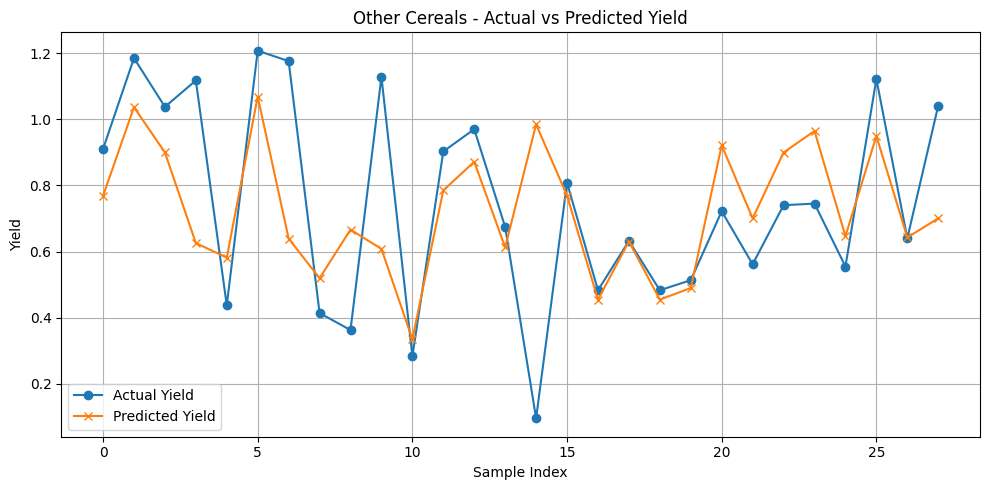

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the predictions
df_plot = pd.read_csv("final_actual_vs_predicted_stratified_per_crop.csv")

# ✅ Updated Best, Average, Worst crops based on R² scores
selected_crops = [
    "Sannhamp",        # Best (R²: 0.988)
    "Arecanut",        # Best (R²: 0.970)
    "Niger seed",      # Average (R²: 0.922)
    "Barley",          # Average (R²: 0.908)
    "Safflower",       # Worst (R²: 0.285)
    "Other Cereals"    # Worst (R²: 0.178)
]

# Individual plots for each crop
for crop in selected_crops:
    crop_df = df_plot[df_plot["Crop"] == crop].reset_index(drop=True)

    plt.figure(figsize=(10, 5))
    plt.plot(crop_df.index, crop_df["Actual_Yield"], label="Actual Yield", marker='o')
    plt.plot(crop_df.index, crop_df["Predicted_Yield"], label="Predicted Yield", marker='x')

    plt.title(f"{crop} - Actual vs Predicted Yield")
    plt.xlabel("Sample Index")
    plt.ylabel("Yield")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{crop.replace(' ', '_')}_lineplot.png", dpi=300)
    plt.show()

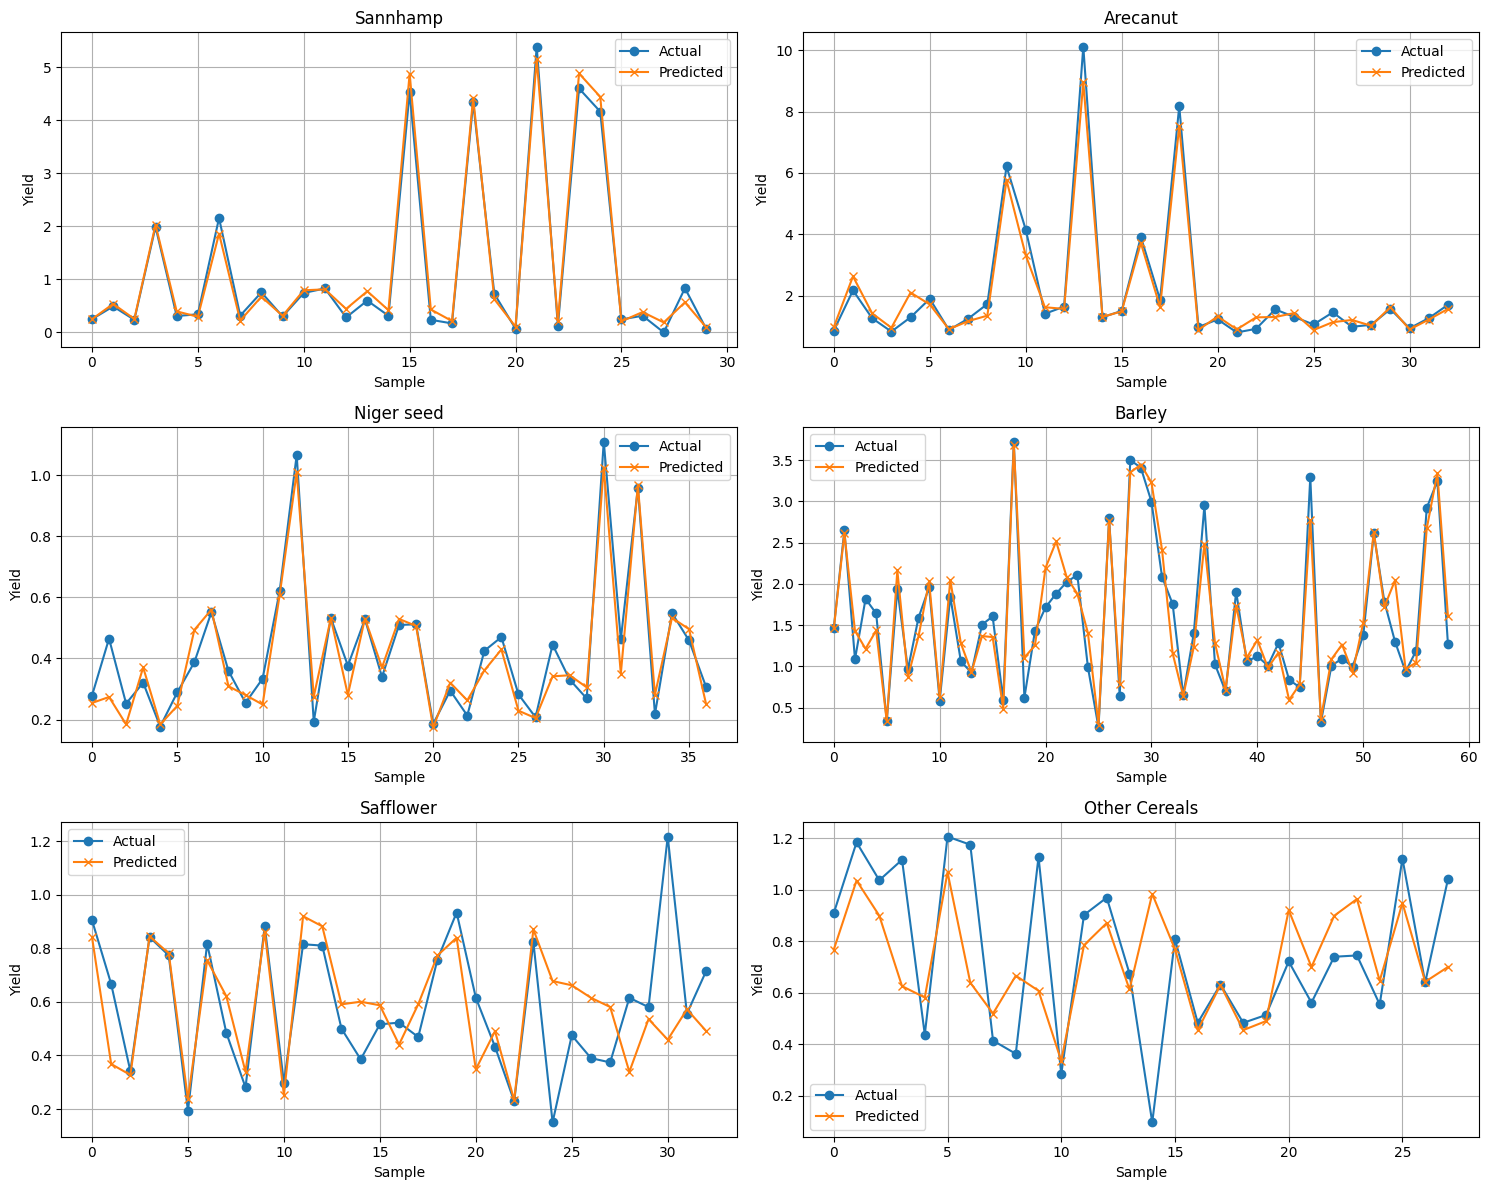

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))
axs = axs.flatten()

for i, crop in enumerate(selected_crops):  # Include all 6 crops
    crop_df = df_plot[df_plot["Crop"] == crop].reset_index(drop=True)
    axs[i].plot(crop_df.index, crop_df["Actual_Yield"], label="Actual", marker='o')
    axs[i].plot(crop_df.index, crop_df["Predicted_Yield"], label="Predicted", marker='x')
    axs[i].set_title(f"{crop}")
    axs[i].set_xlabel("Sample")
    axs[i].set_ylabel("Yield")
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.savefig("multi_crop_lineplot_grid.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd

crop_counts = df['Crop'].value_counts()
crop_counts_sorted = crop_counts.sort_index()

print(crop_counts_sorted)

Crop
Arecanut                  162
Arhar/Tur                 498
Bajra                     523
Banana                    236
Barley                    292
Black pepper              123
Cashewnut                 133
Castor seed               296
Coconut                   168
Coriander                 188
Cotton(lint)              464
Cowpea(Lobia)             128
Dry chillies              396
Garlic                    240
Ginger                    318
Gram                      477
Groundnut                 718
Horse-gram                370
Jowar                     507
Jute                      174
Linseed                   301
Maize                     964
Masoor                    317
Mesta                     202
Moong(Green Gram)         733
Moth                      106
Niger seed                184
Onion                     437
Other  Rabi pulses        347
Other Cereals             139
Other Kharif pulses       381
Other_Crops               237
Peas & beans (Pulses)     362
Potat

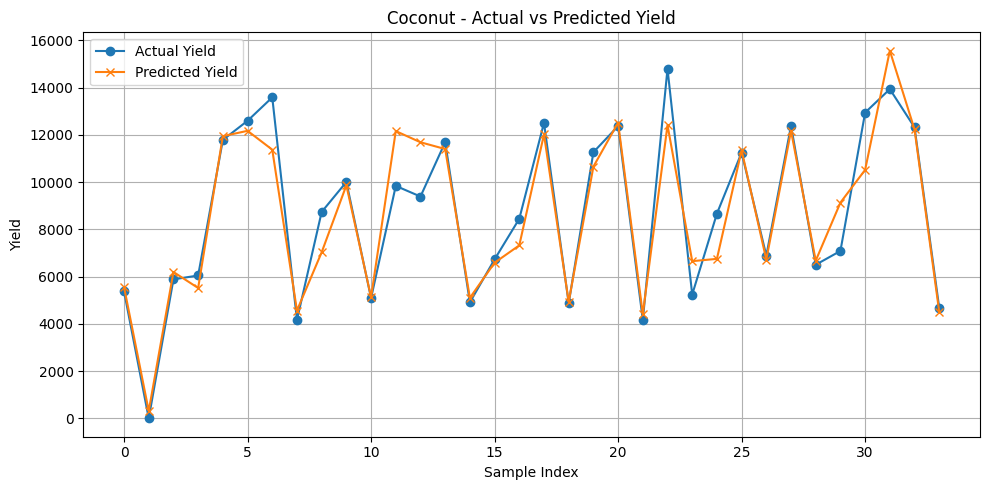

In [ ]:
coconut_df = df_plot[df_plot["Crop"] == "Coconut"].reset_index(drop=True)

plt.figure(figsize=(10, 5))
plt.plot(coconut_df.index, coconut_df["Actual_Yield"], label="Actual Yield", marker='o')
plt.plot(coconut_df.index, coconut_df["Predicted_Yield"], label="Predicted Yield", marker='x')

plt.title("Coconut - Actual vs Predicted Yield")
plt.xlabel("Sample Index")
plt.ylabel("Yield")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Coconut_lineplot.png", dpi=300)
plt.show()
